# Midspan deflection - Overall

In [95]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

#########################
dataset = 'Concrete2D-I'
#########################
    
MAX_I = np.array([325, 150])
MIN_I = np.array([-325, -30])
MAX_C = np.array([325, 95])
MIN_C = np.array([-325, -15])

MID_SPAN_ID_320 = [2032, 2033, 2064, 2065] ## for 320
MID_SPAN_ID_480 = [3056, 3057, 3088, 3089] ## for 480
MID_SPAN_ID_640 = [4080, 4081, 4112, 4113] ## for 640

in_dir = f"/home/jovyan/work/gns/rollouts/{dataset}/"
rollouts = glob.glob(in_dir + '*.pkl')
num_rollouts = len(rollouts)

errors = []
for id in range(num_rollouts):
    rollout_path = f"/home/jovyan/work/gns/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)

    simulation_name = rollout_data['metadata']['file_test'][id]

    if 'Concrete2D-C' in rollout_path:
        MAX, MIN = MAX_C, MIN_C
    else:
        MAX, MIN = MAX_I, MIN_I
    y_scaling_factor = (MAX - MIN)[0] / (MAX - MIN)[1]
    
    if '320' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_320
        L = 320
        prefix = '(a)'
    elif '480' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_480
        L = 480
        prefix = '(b)'
    elif '640' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_640
        L = 640
        prefix = '(c)'
    else:
        print('sth wrong with the simulation name!')
    V = simulation_name.split('_')[-1]

    mid_node = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):

        trajectory = np.concatenate([
            rollout_data["initial_positions"],
            rollout_data[rollout_field]], axis=0)
        trajectory[:,:,1] = trajectory[:,:,1] * y_scaling_factor # if xy-scaled
        trajectory = trajectory * (MAX - MIN) + MIN ## inverse normalisation

        mid_node[label] = np.mean(trajectory[:, MID_SPAN_ID,:], axis=1)  # average of 5 particles on the free-end

    deflection_lydyna = mid_node['LS-DYNA'][0, 1] - mid_node['LS-DYNA'][:, 1]
    deflection_gnn = mid_node['GNN'][0, 1] - mid_node['GNN'][:, 1]

    error = np.abs((deflection_lydyna - deflection_gnn) / deflection_lydyna+1e-8)
    print(simulation_name, error[-1])
    errors.append(error[-1])
# errors[-2]=0.08
errors = np.array(errors)
print(f'{dataset} Mean: {errors.mean()}, STD: {errors.std()}')

/tmp/ipykernel_100607/163279903.py:71: RuntimeWarning: invalid value encountered in true_divide
  error = np.abs((deflection_lydyna - deflection_gnn) / deflection_lydyna+1e-8)


S_80_640_Ac_160 0.08571069412399487
S_80_480_Ab_160 0.092175302014974
B_80_480_Ac_160 0.050968897513207934
R_80_480_Ab_120 0.04321729007373956
S_80_320_Aa_120 0.09890021737536513
B_80_320_Aa_80 0.09779565847794693
R_80_640_Ac_120 0.013401459871523613
R_80_320_Aa_160 0.058792253388084435
Concrete2D-I Mean: 0.06762022160485456, STD: 0.028960294162541964


# Midspan deflection - Time history

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#########################
dataset = 'Concrete2D-I'
#########################

# Fig
alpha = 0.7
fig, axs = plt.subplots(2, 3, figsize=(40, 22), constrained_layout=True)
fig.suptitle('Time History of Midspan Deflection', fontsize=40, fontweight='bold')
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['font.size'] = 35
    
MAX_I = np.array([325, 150])
MIN_I = np.array([-325, -30])
MAX_C = np.array([325, 95])
MIN_C = np.array([-325, -15])

MID_SPAN_ID_320 = [2032, 2033, 2064, 2065] ## for 320
MID_SPAN_ID_480 = [3056, 3057, 3088, 3089] ## for 480
MID_SPAN_ID_640 = [4080, 4081, 4112, 4113] ## for 640

# rollouts 5,1,3 for 2d-I
# rollouts 9,6,1 for 2d-C
for figID, id in enumerate([5, 1, 3]):
    rollout_path = f"/home/jovyan/work/gns_1GPU/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)

    simulation_name = rollout_data['metadata']['file_test'][id]

    if 'Concrete2D-C' in rollout_path:
        MAX, MIN = MAX_C, MIN_C
    else:
        MAX, MIN = MAX_I, MIN_I
    y_scaling_factor = (MAX - MIN)[0] / (MAX - MIN)[1]
    
    if '320' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_320
        L = 320
        prefix = '(a)'
    elif '480' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_480
        L = 480
        prefix = '(b)'
    elif '640' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_640
        L = 640
        prefix = '(c)'
    else:
        print('sth wrong with the simulation name!')
    V = simulation_name.split('_')[-1]

    mid_node = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):

        trajectory = np.concatenate([
            rollout_data["initial_positions"],
            rollout_data[rollout_field]], axis=0)
        trajectory[:,:,1] = trajectory[:,:,1] * y_scaling_factor # if xy-scaled
        trajectory = trajectory * (MAX - MIN) + MIN ## inverse normalisation

        mid_node[label] = np.mean(trajectory[:, MID_SPAN_ID,:], axis=1)  # average of 5 particles on the free-end

    deflection_lydyna = mid_node['LS-DYNA'][0, 1] - mid_node['LS-DYNA'][:, 1]
    deflection_gnn = mid_node['GNN'][0, 1] - mid_node['GNN'][:, 1]
    
    error_temp = abs(deflection_lydyna - deflection_gnn) / (abs(deflection_lydyna) + 1e-8)
    error = np.where((deflection_lydyna < 0.06) | (error_temp > 0.9), 0, error_temp)
    deflection_gnn = np.where((deflection_lydyna < 0.06) | (error_temp > 0.9), deflection_lydyna, deflection_gnn)
    print(error[-15:])
    
    # Plot
    num_steps = trajectory.shape[0]

    axs[0,figID].plot(np.linspace(0, 0.5, num_steps), deflection_lydyna, 'b-', alpha=alpha, label='SPH')
    axs[0,figID].plot(np.linspace(0, 0.5, num_steps), deflection_gnn, 'r--', alpha=alpha, label='GNN')
    
    simulation_name = simulation_name.replace('_', '-')
    simulation_name = simulation_name.replace('S', 'D')
    simulation_name = simulation_name.replace('R', 'P')
    simulation_name = simulation_name.replace('B', 'R')
    axs[0,figID].set_title(f'{prefix} {simulation_name}',pad=10)
    axs[0,figID].set_xlabel('Time (s)')
    axs[0,figID].set_ylabel('Deflection (mm)')
    axs[0,figID].legend(['SPH', 'GNN'], prop={'size': 35})
    axs[0,figID].grid(True, linestyle='--')
    
    # axs[0].set_xlim([0, 32])
    # axs[0].set_ylim(ylim)
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[0,figID].spines[axis].set_linewidth(3)
    
    
    
    # ## Smooth error when gt = 0
    # idxs = np.abs(deflection_lydyna).argsort()[:5]
    # for e in [error]:
    #     for ind in idxs:
    #         e[ind] = e[ind-3]/6 + e[ind-2]/6 + e[ind-1]/6 + e[ind+1]/6 + e[ind+2]/6 + e[ind+3]/6
    #     e[0] = 0

    axs[1,figID].plot(np.linspace(0, 0.5, num_steps-6), error[6:] * 100, 'b-^', alpha=alpha, markersize=10)
    axs[1,figID].set_xlabel('Time (s)')
    axs[1,figID].set_ylabel('Percentage error (%)')
    axs[1,figID].grid(True, linestyle='--')
    # axs[1].set_xlim([0, 32])
    axs[1,figID].set_ylim([-0.5, 10])
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[1,figID].spines[axis].set_linewidth(3)
    
    
    # plt.savefig(f'2D_Midspan_deflection_{id}.png', pad_inches=0, dpi=300, bbox_inches='tight')

[0.06731538 0.06924692 0.07178109 0.07373636 0.07569571 0.07824036
 0.08022539 0.08221194 0.0847657  0.08676176 0.08929747 0.09129783
 0.09329127 0.09580684 0.09779565]
[0.0694016  0.07078995 0.07277693 0.0741557  0.07558016 0.07757401
 0.07897885 0.08097129 0.08239319 0.08383258 0.085822   0.08725359
 0.08872795 0.09071772 0.09217529]
[0.01307167 0.01512837 0.01777573 0.0198206  0.02184657 0.02443495
 0.02642566 0.02839746 0.0309012  0.03282893 0.03527375 0.03715824
 0.03902334 0.0413864  0.04321728]


# Effective Plastic Strain (EPS) - Time history

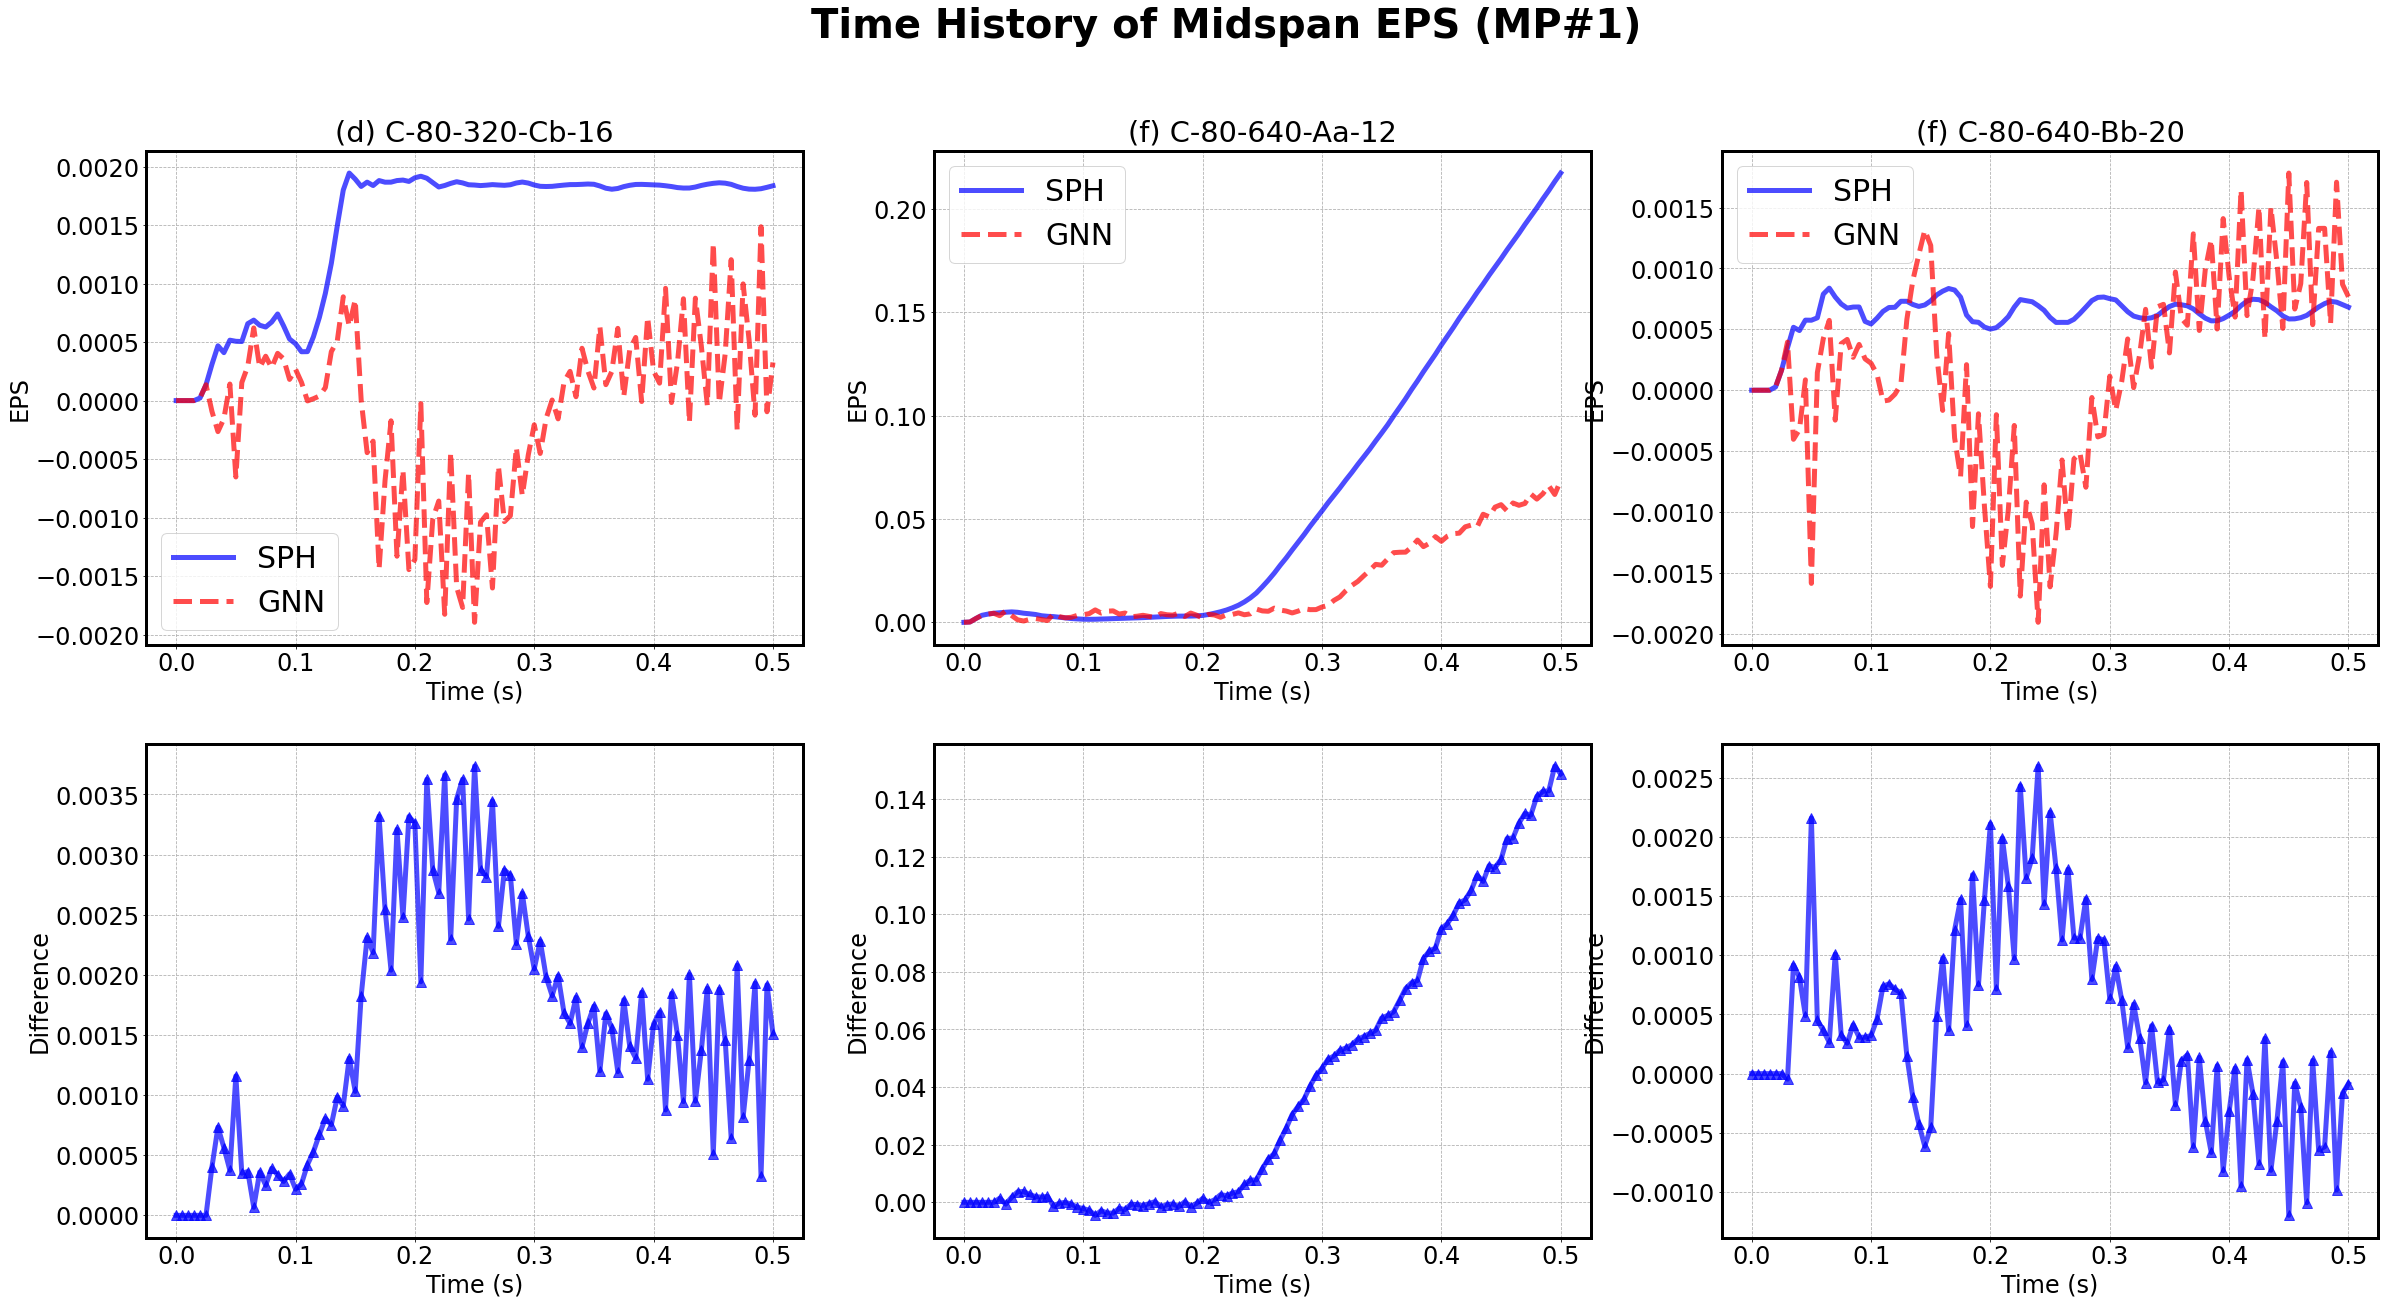

In [137]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#########################
dataset = 'Concrete2D-C'
#########################

# Fig
alpha = 0.7
fig, axs = plt.subplots(2, 3, figsize=(40, 20), constrained_layout=False)
fig.suptitle('Time History of Midspan EPS (MP#1)', fontsize=40, fontweight='bold')
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['font.size'] = 24
    
MAX_I = np.array([325, 150])
MIN_I = np.array([-325, -30])
MAX_C = np.array([325, 95])
MIN_C = np.array([-325, -15])

MID_SPAN_ID_320 = [2032, 2033, 2064, 2065] ## for 320
MID_SPAN_ID_480 = [3056, 3057, 3088, 3089] ## for 480
MID_SPAN_ID_640 = [4080, 4081, 4112, 4113] ## for 640

# rollouts 5,1,3 for 2d-I
# rollouts 7,4,1 for 2d-C
for figID, id in enumerate([5,3,0]):
    rollout_path = f"/home/jovyan/work/gns/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)

    simulation_name = rollout_data['metadata']['file_test'][id]

    if 'Concrete2D-C' in rollout_path:
        MAX, MIN = MAX_C, MIN_C
    else:
        MAX, MIN = MAX_I, MIN_I
    y_scaling_factor = (MAX - MIN)[0] / (MAX - MIN)[1]
    
    if '320' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_320
        L = 320
        prefix = '(d)'
    elif '480' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_480
        L = 480
        prefix = '(e)'
    elif '640' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_640
        L = 640
        prefix = '(f)'
    else:
        print('sth wrong with the simulation name!')
    V = simulation_name.split('_')[-1]

    mid_node_strain = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):
        
        if label == "LS-DYNA":
            strain = np.mean(rollout_data["ground_truth_strain"][:, MID_SPAN_ID], axis=1)
        elif label == "GNN":
            strain = np.mean(rollout_data["predicted_strain"][:, MID_SPAN_ID], axis=1)
            
        strain = strain * (STRAIN_MAX - STRAIN_MIN) + STRAIN_MIN
        mid_node_strain[label] = strain   
    
    eps_sph = mid_node_strain['LS-DYNA']
    eps_gnn = mid_node_strain['GNN']
    
    # Plot
    num_steps = trajectory.shape[0]

    axs[0,figID].plot(np.linspace(0, 0.5, num_steps), eps_sph, 'b-', alpha=alpha, label='SPH')
    axs[0,figID].plot(np.linspace(0, 0.5, num_steps), eps_gnn, 'r--', alpha=alpha, label='GNN')
    
    simulation_name = simulation_name.replace('_', '-')
    axs[0,figID].set_title(f'{prefix} {simulation_name}',pad=10)
    axs[0,figID].set_xlabel('Time (s)')
    axs[0,figID].set_ylabel('EPS')
    axs[0,figID].legend(['SPH', 'GNN'], prop={'size': 30})
    axs[0,figID].grid(True, linestyle='--')
    
    # axs[0].set_xlim([0, 32])
    # axs[0].set_ylim(ylim)
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[0,figID].spines[axis].set_linewidth(3)


    error = ((eps_sph - eps_gnn) / 1)


    axs[1,figID].plot(np.linspace(0, 0.5, num_steps), error, 'b-^', alpha=alpha, markersize=10)
    axs[1,figID].set_xlabel('Time (s)')
    axs[1,figID].set_ylabel('Difference')
    axs[1,figID].grid(True, linestyle='--')
    # axs[1].set_xlim([0, 32])
    # axs[1].set_ylim([-1, 10])
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[1,figID].spines[axis].set_linewidth(3)
    
    
    # plt.savefig(f'2D_Midspan_deflection_{id}.png', pad_inches=0, dpi=300, bbox_inches='tight')

# Maximal Principal Strain (MPS) - Time History

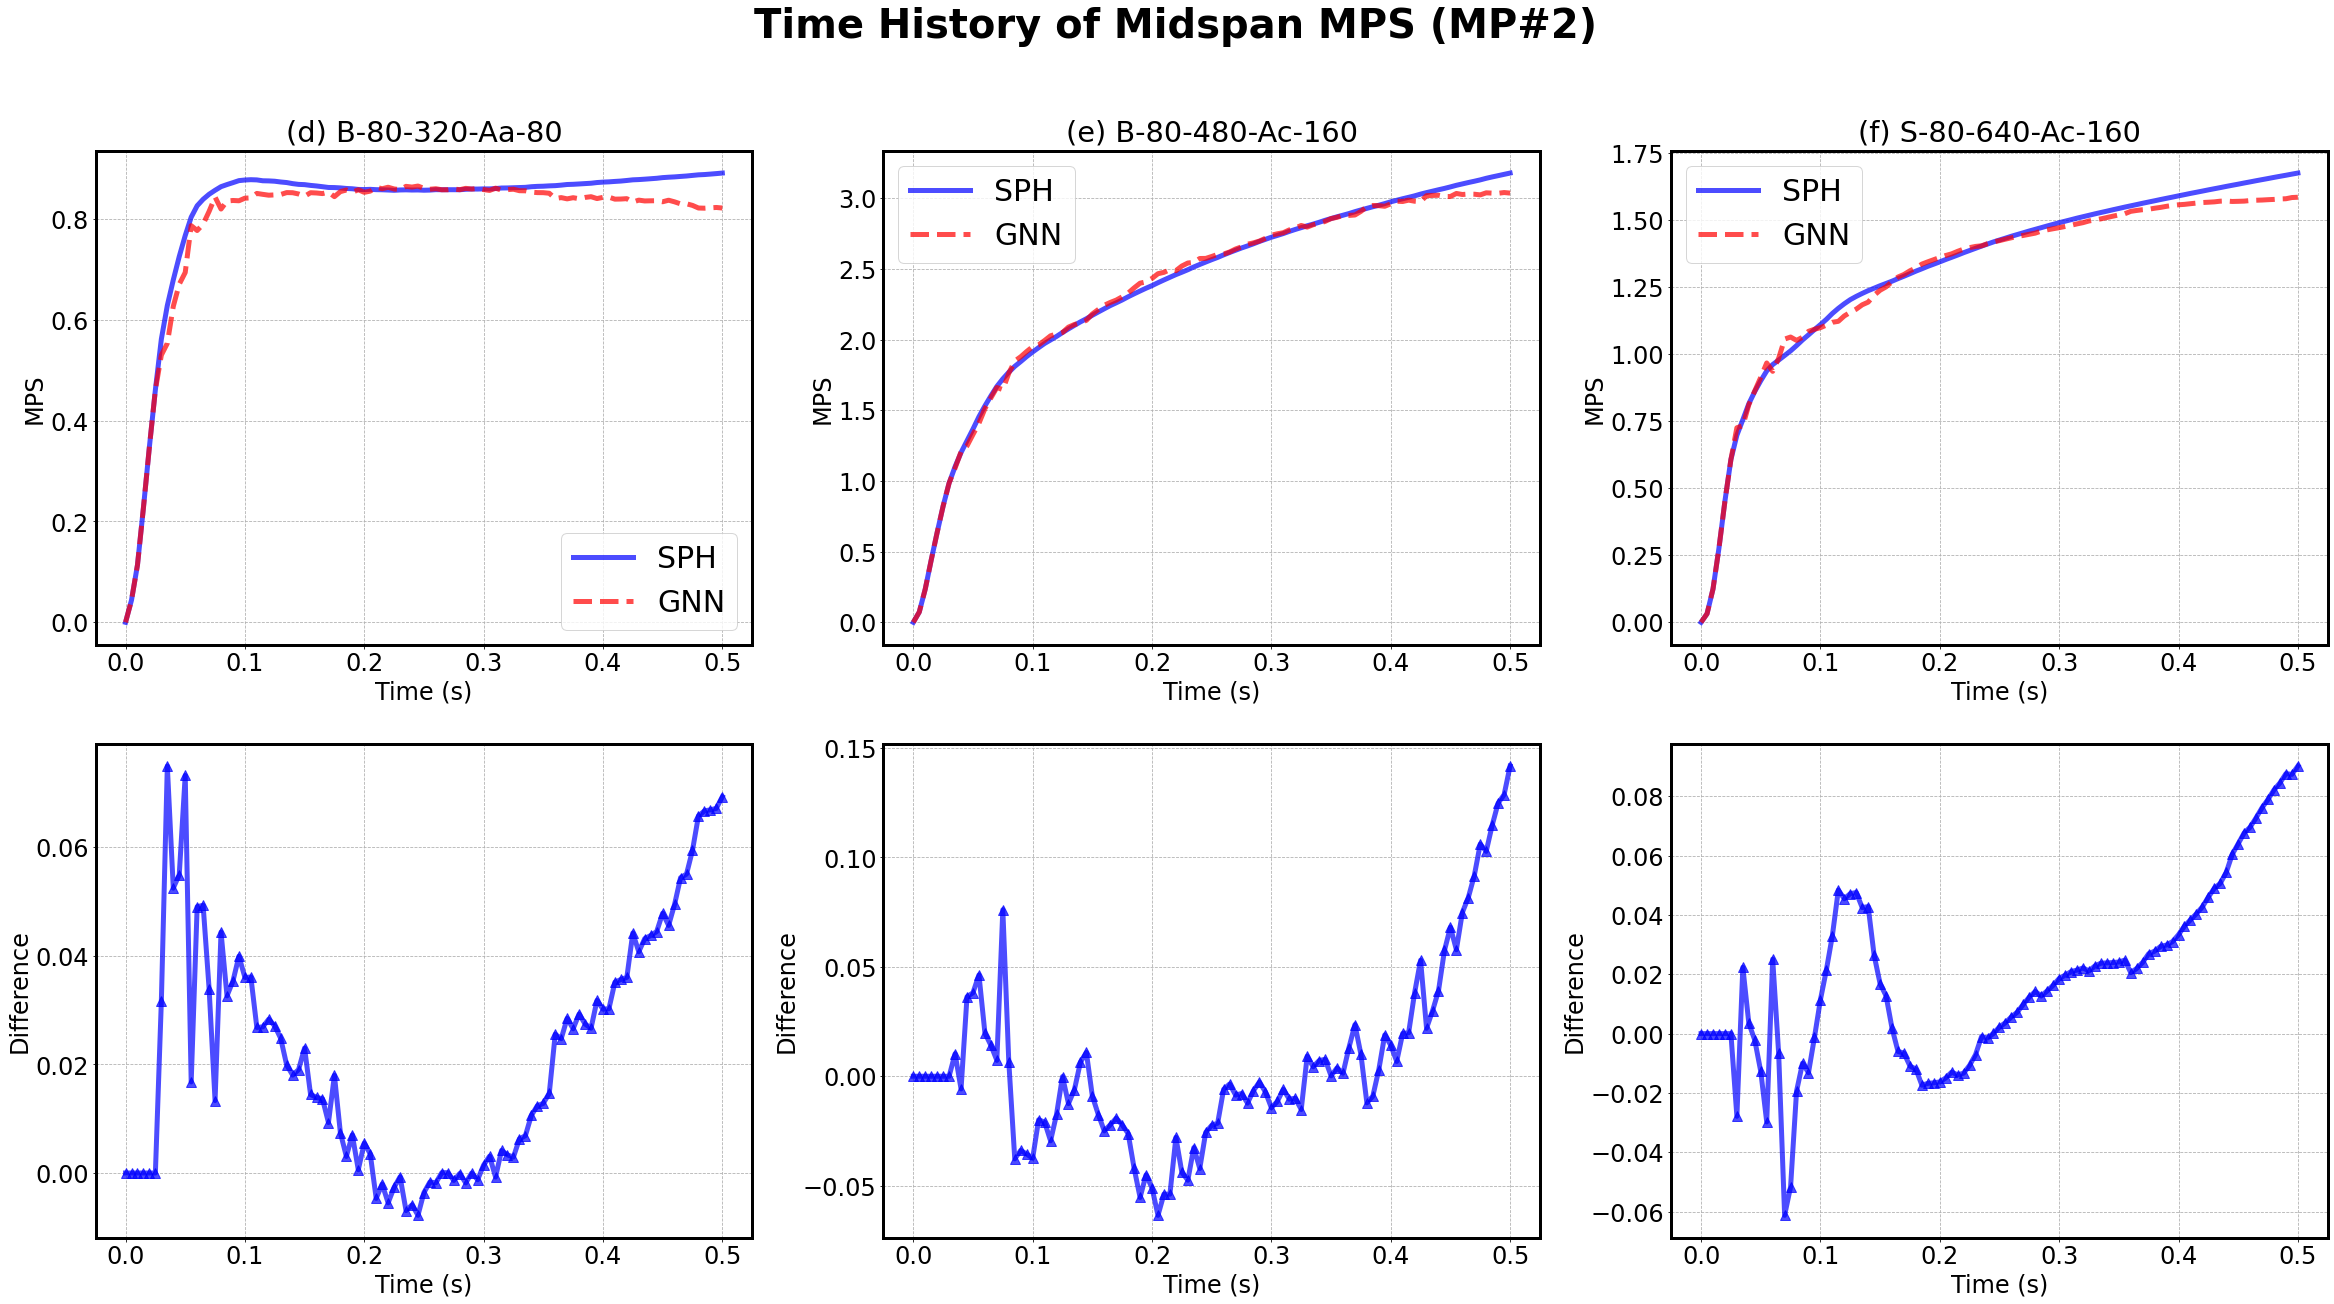

In [154]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#########################
dataset = 'Concrete2D-I-mps'
#########################

# Fig
alpha = 0.7
fig, axs = plt.subplots(2, 3, figsize=(40, 20), constrained_layout=False)
fig.suptitle('Time History of Midspan MPS (MP#2)', fontsize=40, fontweight='bold')
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['font.size'] = 24
    
MAX_I = np.array([325, 150])
MIN_I = np.array([-325, -30])
MAX_C = np.array([325, 95])
MIN_C = np.array([-325, -15])

MID_SPAN_ID_320 = [2032, 2033, 2064, 2065] ## for 320
MID_SPAN_ID_480 = [3056, 3057, 3088, 3089] ## for 480
MID_SPAN_ID_640 = [4080, 4081, 4112, 4113] ## for 640

# rollouts 5,1,3 for 2d-I-mps
# rollouts 5,6,3 for 2d-C-mpz
for figID, id in enumerate([5, 2, 4]):
    rollout_path = f"/home/jovyan/work/gns/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)

    simulation_name = rollout_data['metadata']['file_test'][id]

    if 'Concrete2D-C' in rollout_path:
        MAX, MIN = MAX_C, MIN_C
    else:
        MAX, MIN = MAX_I, MIN_I
    y_scaling_factor = (MAX - MIN)[0] / (MAX - MIN)[1]
    
    if '320' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_320
        L = 320
        prefix = '(d)'
    elif '480' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_480
        L = 480
        prefix = '(e)'
    elif '640' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_640
        L = 640
        prefix = '(f)'
    else:
        print('sth wrong with the simulation name!')
    V = simulation_name.split('_')[-1]

    all_strain = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):
        
        if label == 'LS-DYNA':
            strain = rollout_data['ground_truth_strain']
            strain = strain * (STRAIN_MAX - STRAIN_MIN) + STRAIN_MIN
            all_strain[label] = strain
        else:
            strain = rollout_data['predicted_strain']
            strain = strain * (STRAIN_MAX - STRAIN_MIN) + STRAIN_MIN
            all_strain[label] = strain
    
    strain = all_strain['LS-DYNA']
    strain_mean = np.mean(strain, axis=0)
    max_strain_particles = strain_mean.argsort()
    mps_sph = all_strain['LS-DYNA'][:, max_strain_particles[-10:]].mean(axis=1) 
    mps_gnn = all_strain['GNN'][:, max_strain_particles[-10:]].mean(axis=1) 
    
    # Plot
    num_steps = trajectory.shape[0]

    axs[0,figID].plot(np.linspace(0, 0.5, num_steps), mps_sph, 'b-', alpha=alpha, label='SPH')
    axs[0,figID].plot(np.linspace(0, 0.5, num_steps), mps_gnn, 'r--', alpha=alpha, label='GNN')
    
    simulation_name = simulation_name.replace('_', '-')
    axs[0,figID].set_title(f'{prefix} {simulation_name}',pad=10)
    axs[0,figID].set_xlabel('Time (s)')
    axs[0,figID].set_ylabel('MPS')
    axs[0,figID].legend(['SPH', 'GNN'], prop={'size': 30})
    axs[0,figID].grid(True, linestyle='--')
    
    # axs[0].set_xlim([0, 32])
    # axs[0].set_ylim(ylim)
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[0,figID].spines[axis].set_linewidth(3)


    error = ((mps_sph - mps_gnn) / 1)


    axs[1,figID].plot(np.linspace(0, 0.5, num_steps), error, 'b-^', alpha=alpha, markersize=10)
    axs[1,figID].set_xlabel('Time (s)')
    axs[1,figID].set_ylabel('Difference')
    axs[1,figID].grid(True, linestyle='--')
    # axs[1].set_xlim([0, 32])
    # axs[1].set_ylim([-1, 10])
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[1,figID].spines[axis].set_linewidth(3)
    
    
    # plt.savefig(f'2D_Midspan_deflection_{id}.png', pad_inches=0, dpi=300, bbox_inches='tight')

# Midspan(EPS)/Notch(MPS) Strain-Time history

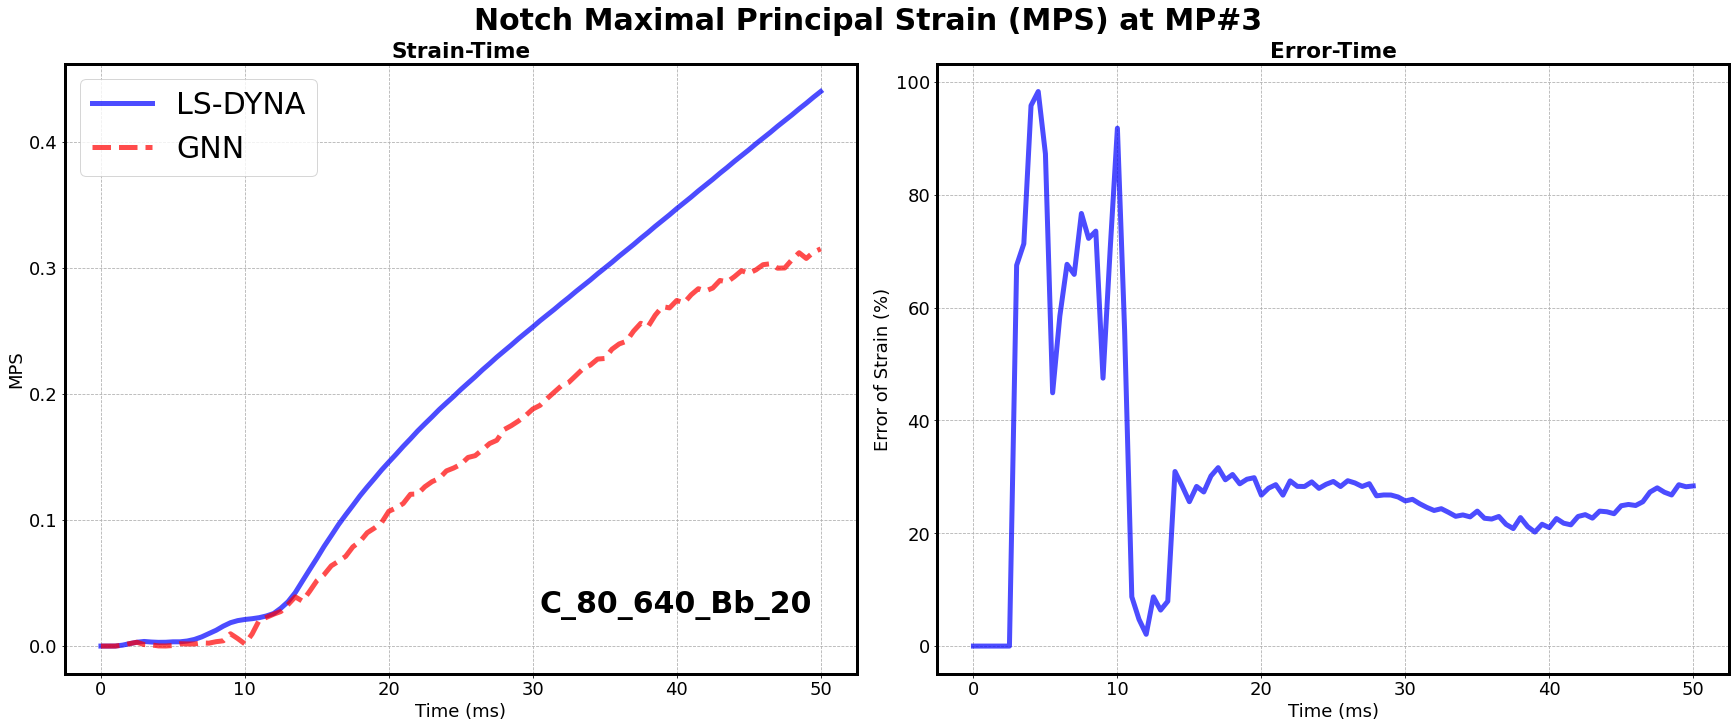

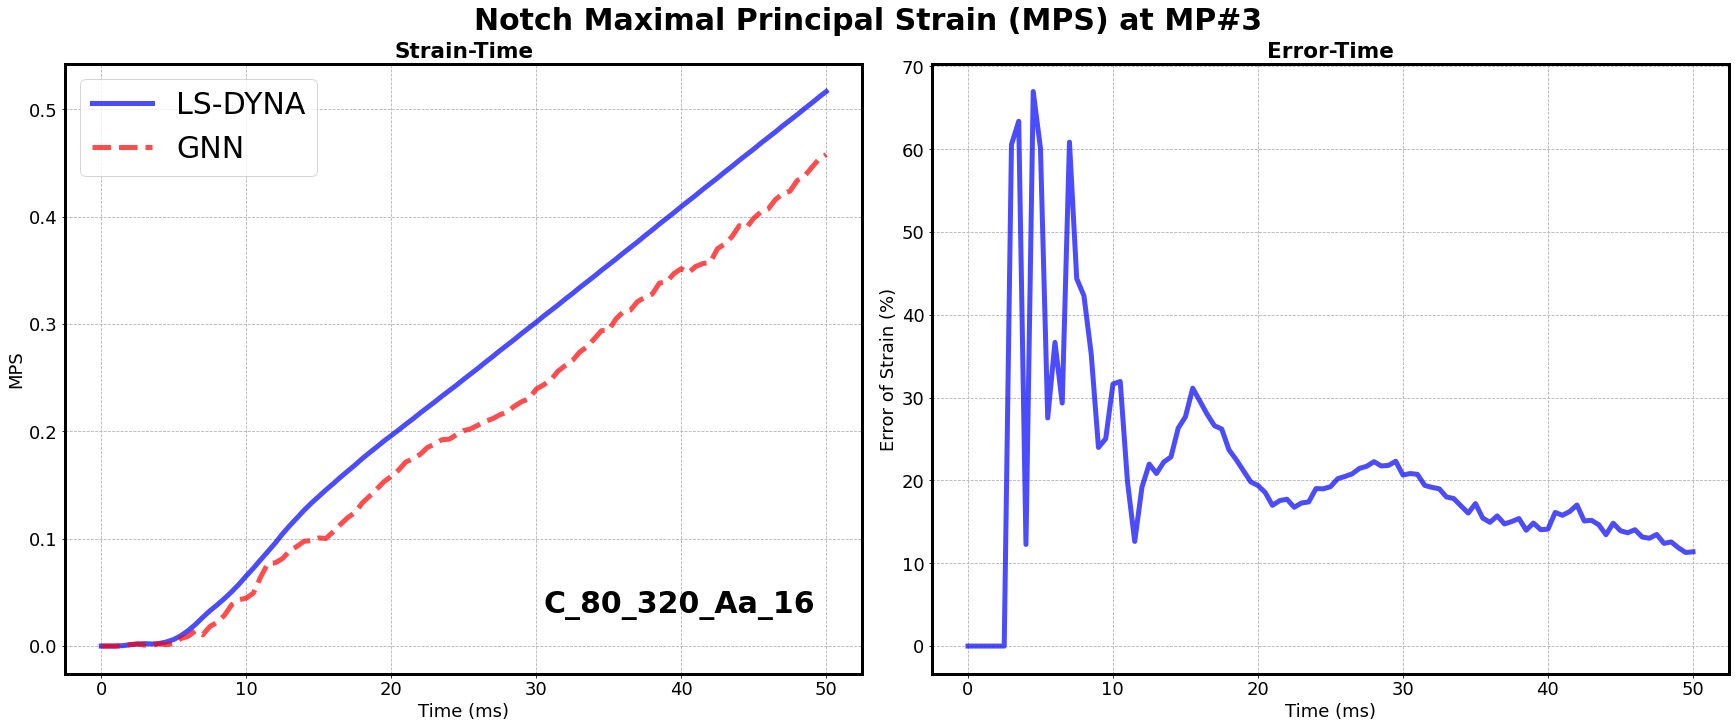

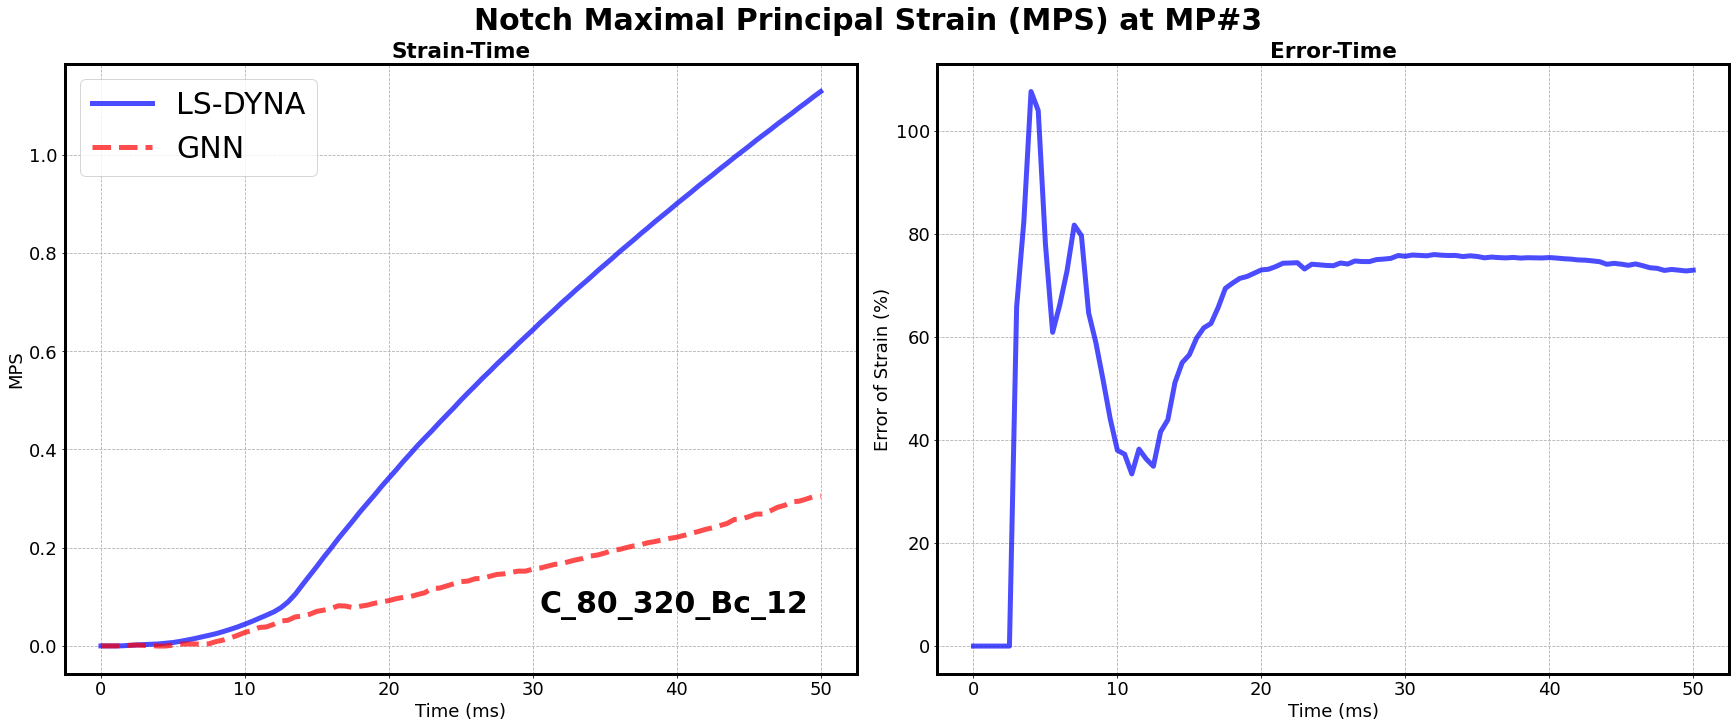

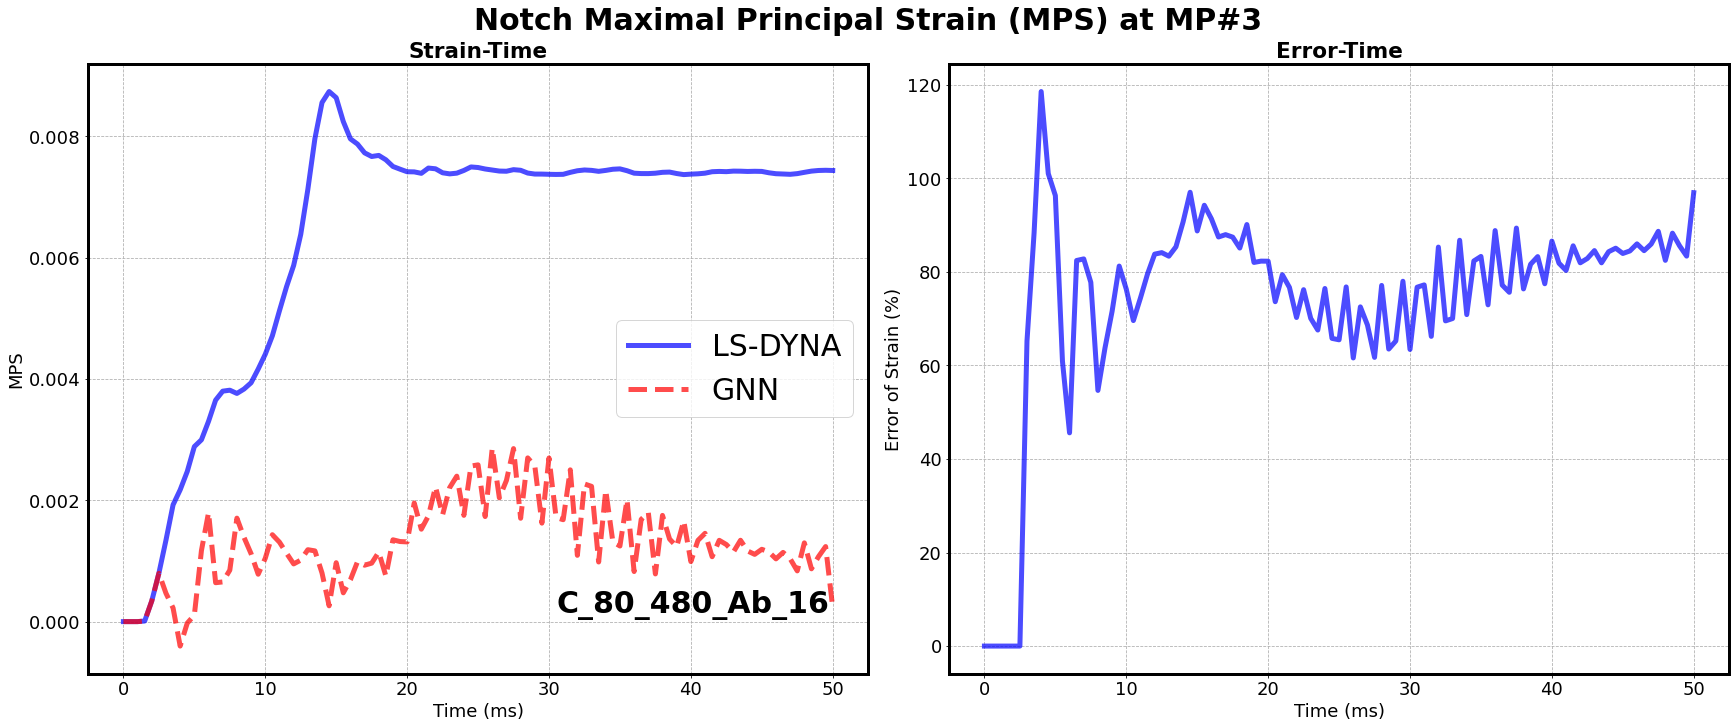

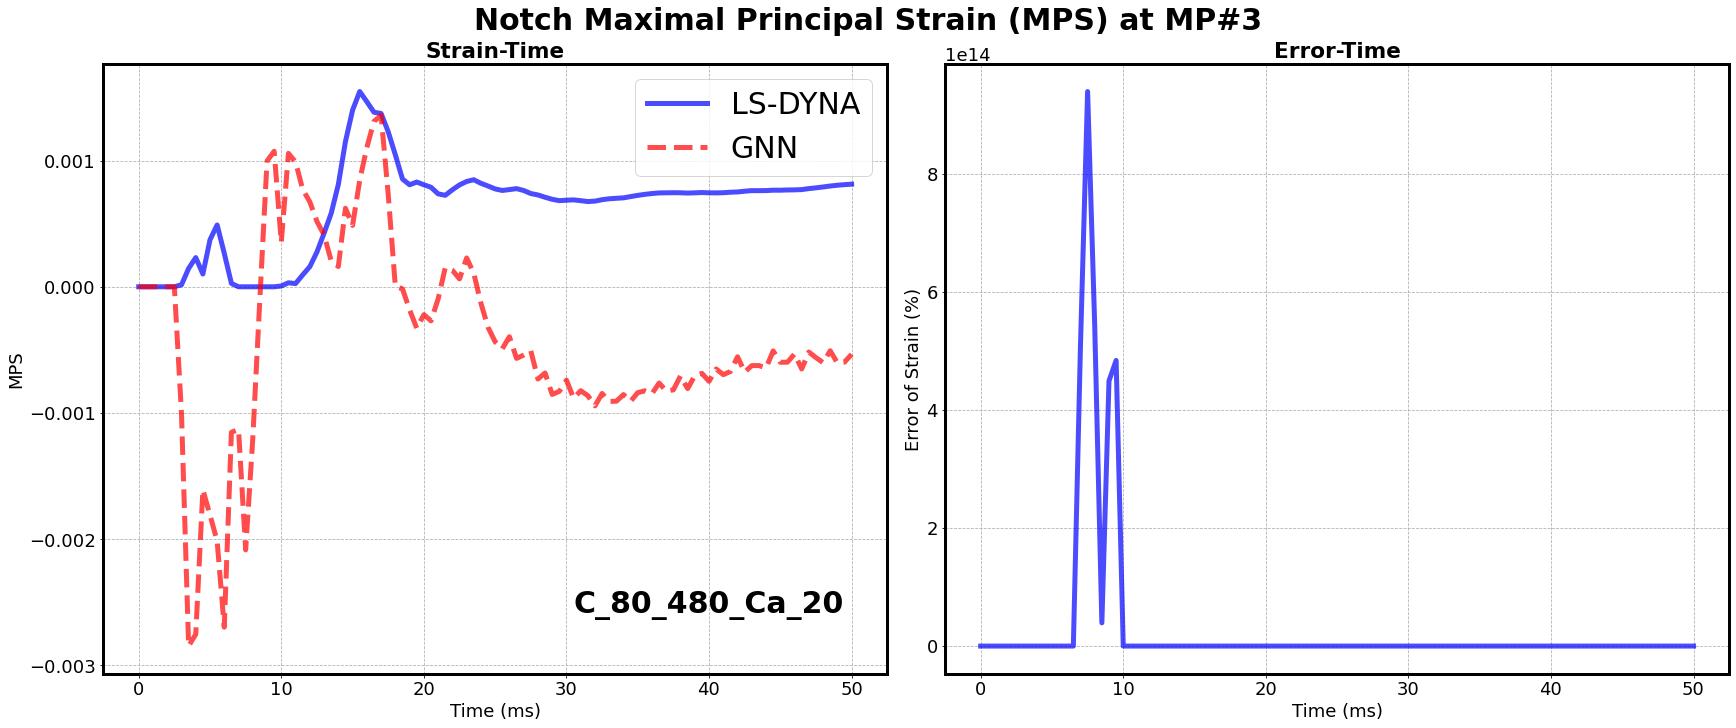

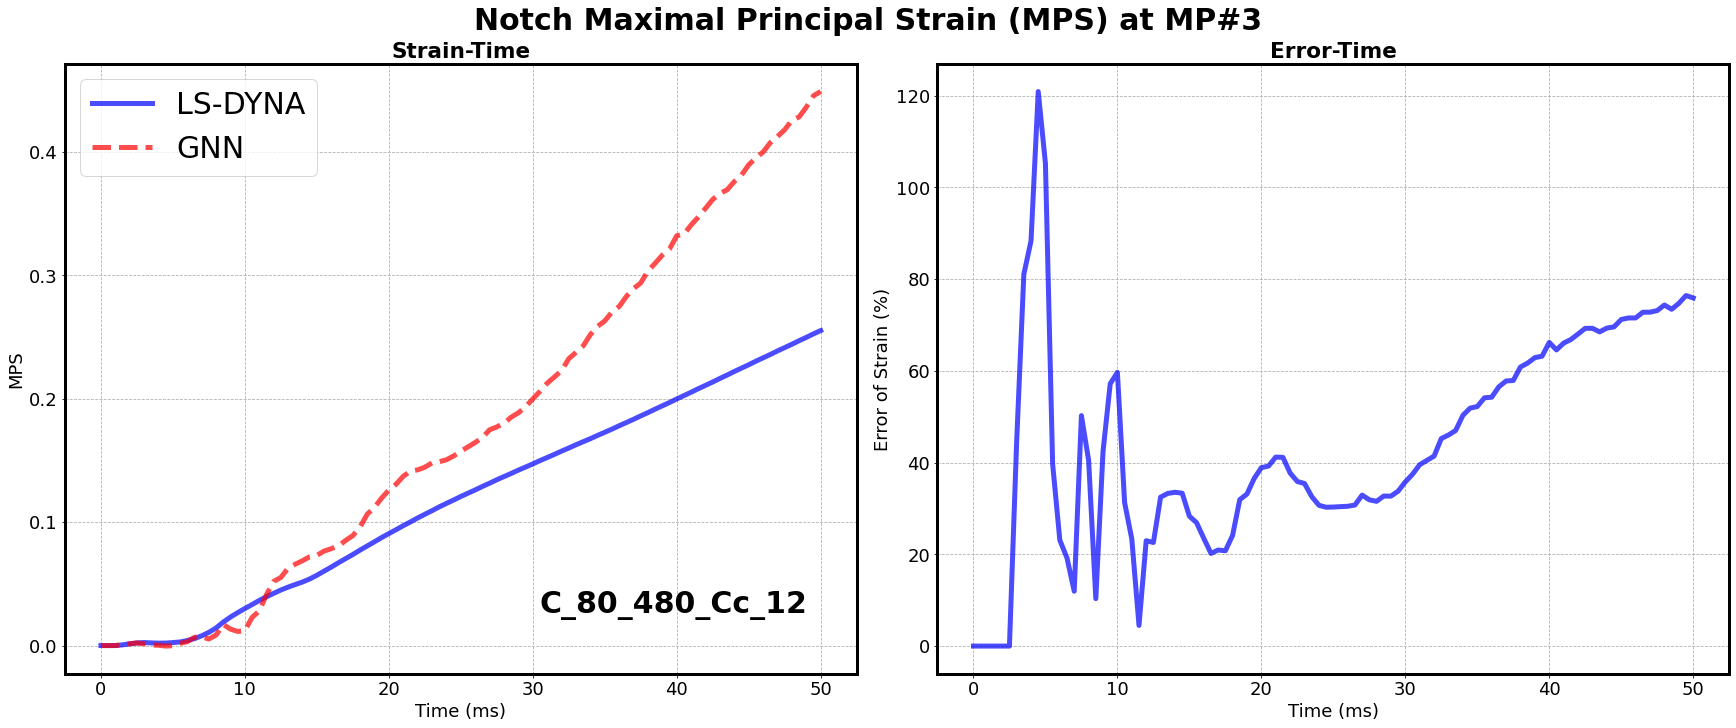

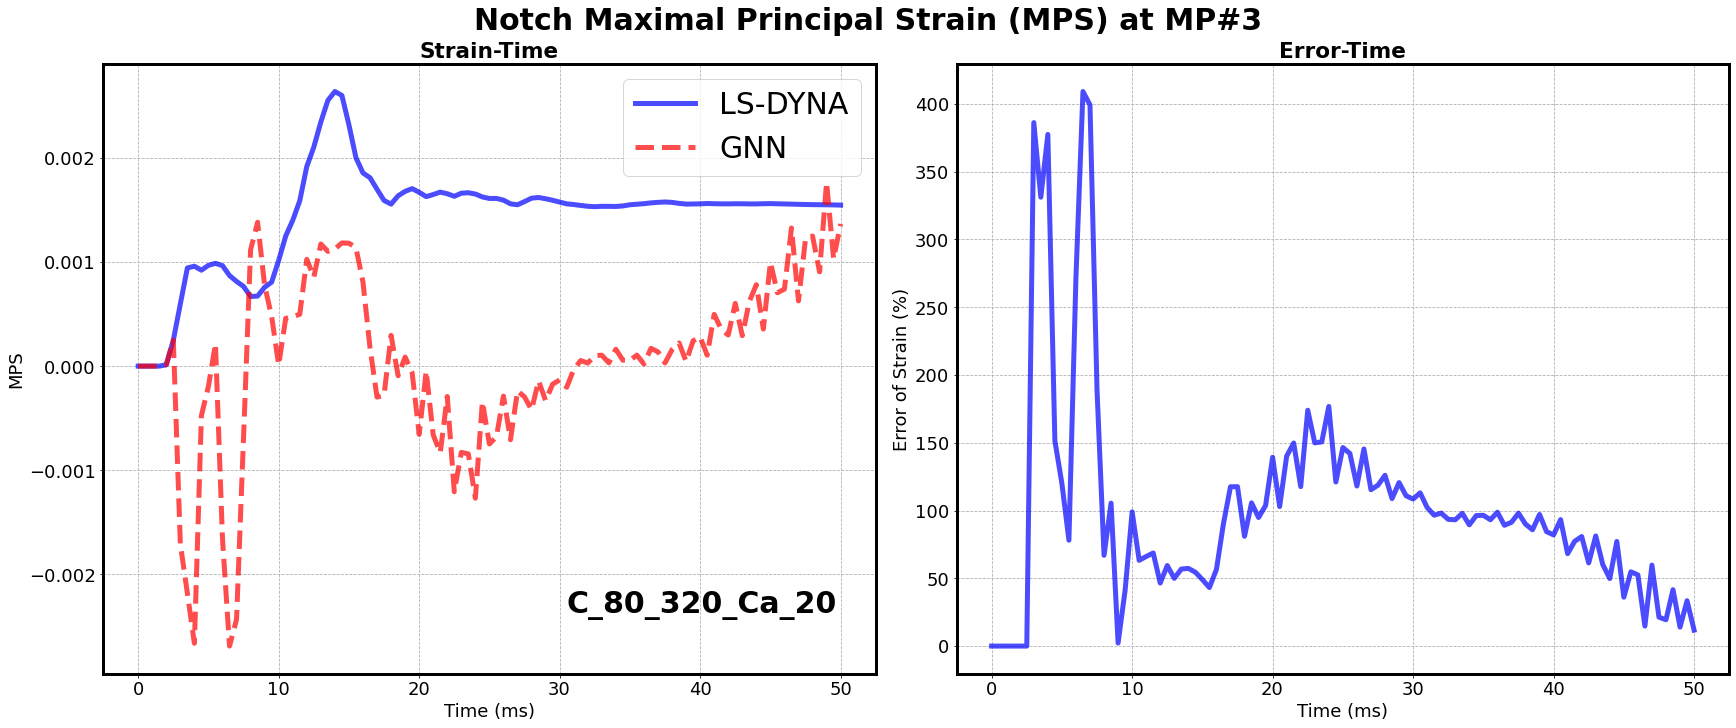

In [139]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

###############################
dataset = 'Concrete2D-C-mps'
###############################

STRAIN_MIN, STRAIN_MAX = 0, 2

MAX_I = np.array([325, 150])
MIN_I = np.array([-325, -30])
MAX_C = np.array([325, 95])
MIN_C = np.array([-325, -15])

## Id of particles of interest, either midspan or on top of notch
MID_SPAN_ID_320 = [2032, 2033, 2064, 2065] ## for 320
MID_SPAN_ID_480 = [3056, 3057, 3088, 3089] ## for 480
MID_SPAN_ID_640 = [4080, 4081, 4112, 4113] ## for 640

UP_NOTCH_ID = {'320a': [2021, 2022, 2053, 2054],
               '320b': [2533, 2534, 2565, 2566],
               '320c': [3045, 3046, 3077, 3078],
               '480a': [3045, 3046, 3077, 3078],
               '480b': [3813, 3814, 3845, 3846],
               '480c': [4581, 4582, 4613, 4614],
               '640a': [4069, 4070, 4101, 4102],
               '640b': [5093, 5094, 5125, 5126],
               '640c': [6117, 6118, 6149, 6150]
              }


for id in range(10):
    rollout_path = f"/home/jovyan/work/gns/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)

    simulation_name = rollout_data['metadata']['file_test'][id]
    
    if 'Concrete2D-C' in rollout_path:
        MAX, MIN = MAX_C, MIN_C
    else:
        MAX, MIN = MAX_I, MIN_I

    if '320' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_320
        L = 320
    elif '480' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_480
        L = 480
    elif '640' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_640
        L = 640
    else:
        print('sth wrong with the simulation name!')
    
    if 'mps' in dataset:
        for key, value in UP_NOTCH_ID.items():
            if key[:-1] in simulation_name and key[-1] in simulation_name:
                MID_SPAN_ID = value
          
    V = simulation_name.split('_')[-1]

    plot_info = []
    mid_node_strain = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):
        
        if label == "LS-DYNA":
            strain = np.mean(rollout_data["ground_truth_strain"][:, MID_SPAN_ID], axis=1)
        elif label == "GNN":
            strain = np.mean(rollout_data["predicted_strain"][:, MID_SPAN_ID], axis=1)
            
        strain = strain * (STRAIN_MAX - STRAIN_MIN) + STRAIN_MIN
        mid_node_strain[label] = strain   

    # Plot
    num_steps = trajectory.shape[0]
    alpha = 0.7

    fig, axs = plt.subplots(1, 2, figsize=(24, 10), constrained_layout=True)
    title = 'Notch Maximal Principal Strain (MPS) at MP#3' if 'mps' in dataset else 'Midspan Effective Plastic Strain (EPS) at MP#1'
    ylabel = 'MPS' if 'mps' in dataset else 'EPS'
    fig.suptitle(title, fontsize=30, fontweight='bold')
    
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['font.size'] = 18
    plt.rcParams['lines.markersize'] = 10
    
    axs[0].plot(np.linspace(0, 50, num_steps), mid_node_strain['LS-DYNA'], 'b-', alpha=alpha, label='LS-DYNA')
    axs[0].plot(np.linspace(0, 50, num_steps), mid_node_strain['GNN'], 'r--', alpha=alpha, label='GNN')

    axs[0].set_title(f'Strain-Time', fontweight='bold')
    axs[0].set_xlabel('Time (ms)')
    axs[0].set_ylabel(ylabel)
    axs[0].legend(['LS-DYNA', 'GNN'], prop={'size': 30})
    axs[0].grid(True, linestyle='--')
    y = 0.6 if 'mps' in dataset else 0.3
    axs[0].annotate(simulation_name, xy=(0, 1), xycoords='axes fraction', xytext=(y, 0.1), textcoords='axes fraction', fontsize=30, fontweight='bold')
    # axs[0].set_xlim([0, 32])
    # axs[0].set_ylim(ylim)
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[0].spines[axis].set_linewidth(3)

    ## Draw x-axis and y-axis with arrow    
    # axs[0].annotate('', xy=(0, 1), xycoords='axes fraction', xytext=(0, 0),textcoords='axes fraction', arrowprops=dict(arrowstyle= '-|>', color='k', lw=4, ls='-'))
    # axs[0].annotate('', xy=(1, 0.5), xycoords='axes fraction', xytext=(0, 0.5),textcoords='axes fraction', arrowprops=dict(arrowstyle= '-|>', color='k', lw=4, ls='-'))

    error = np.abs((mid_node_strain['LS-DYNA'] - mid_node_strain['GNN']) / (mid_node_strain['LS-DYNA']+np.finfo(float).eps))

    # # Smooth error when gt = 0
    # idxs = np.abs(displacement_gt).argsort()[1:4]
    # for idx in idxs:
    #     for e in [e_gt_dyna, e_gt_gnn, e_dyna_gnn]:
    #         e[idx] = e[idx-2]/4 + e[idx-1]/4 + e[idx+1]/4 + e[idx+2]/4

    axs[1].plot(np.linspace(0, 50, num_steps), error*100, 'b-', alpha=alpha)

    axs[1].set_title('Error-Time', fontweight='bold')
    axs[1].set_xlabel('Time (ms)')
    axs[1].set_ylabel('Error of Strain (%)')
    axs[1].grid(True, linestyle='--')
    # axs[1].set_xlim([0, 32])
    # axs[1].set_ylim([-1, 10])
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[1].spines[axis].set_linewidth(3)
        
    # plt.savefig(f'2D_C_Midspan_EPS_{id}.png', pad_inches=0, dpi=300, bbox_inches='tight')

# MPS 45 degree

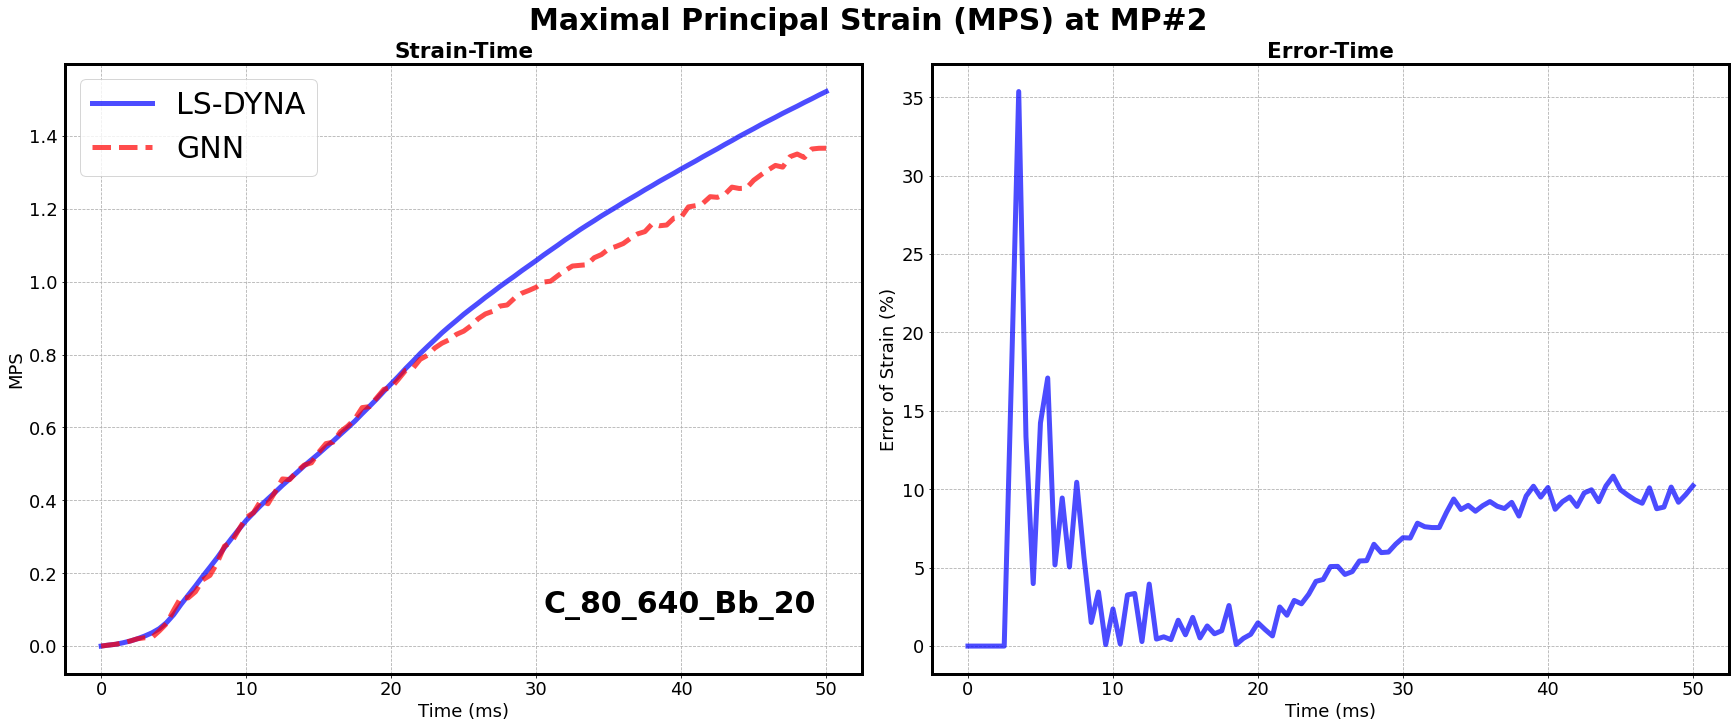

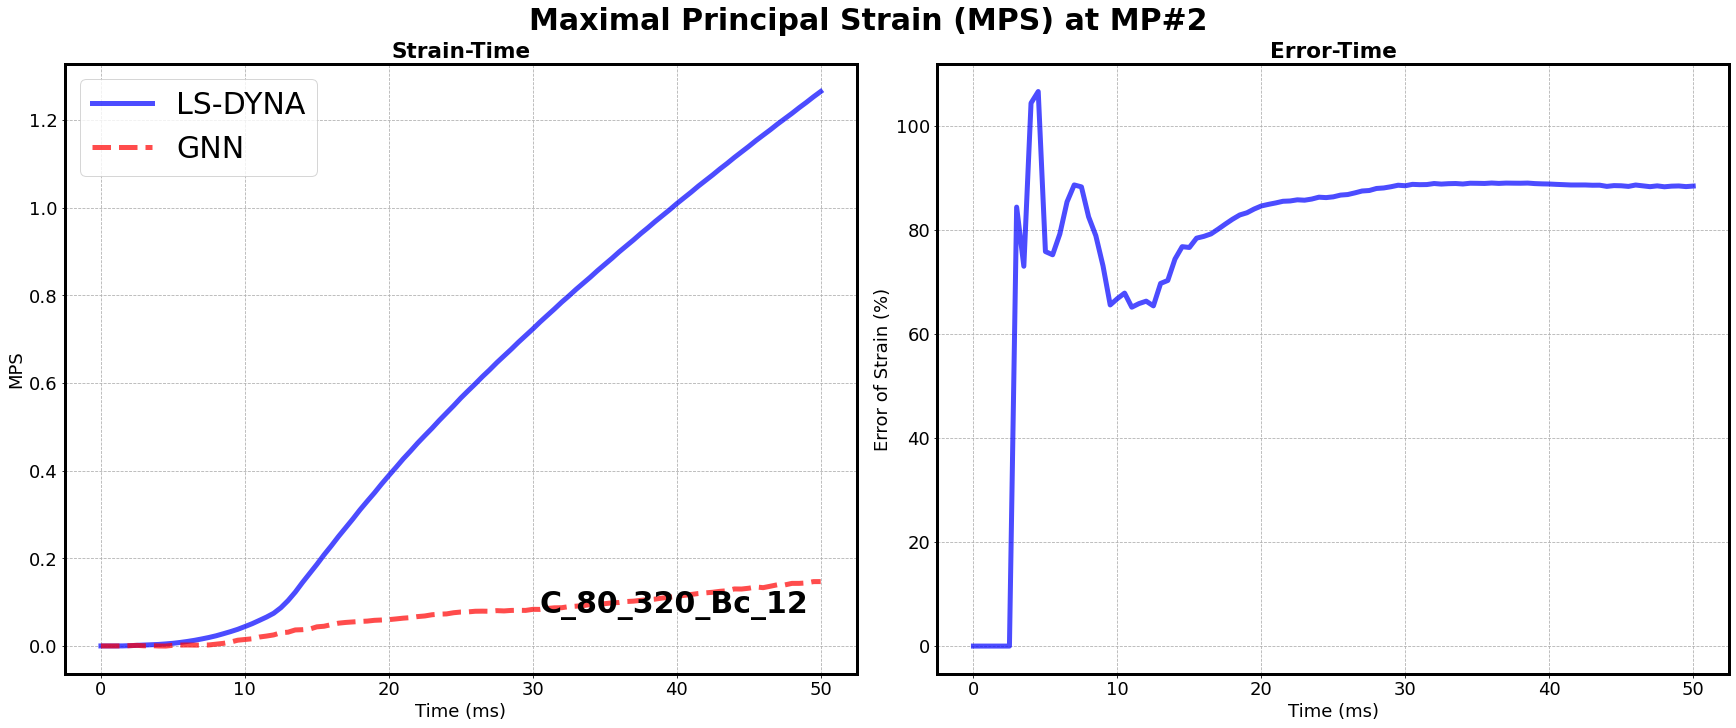

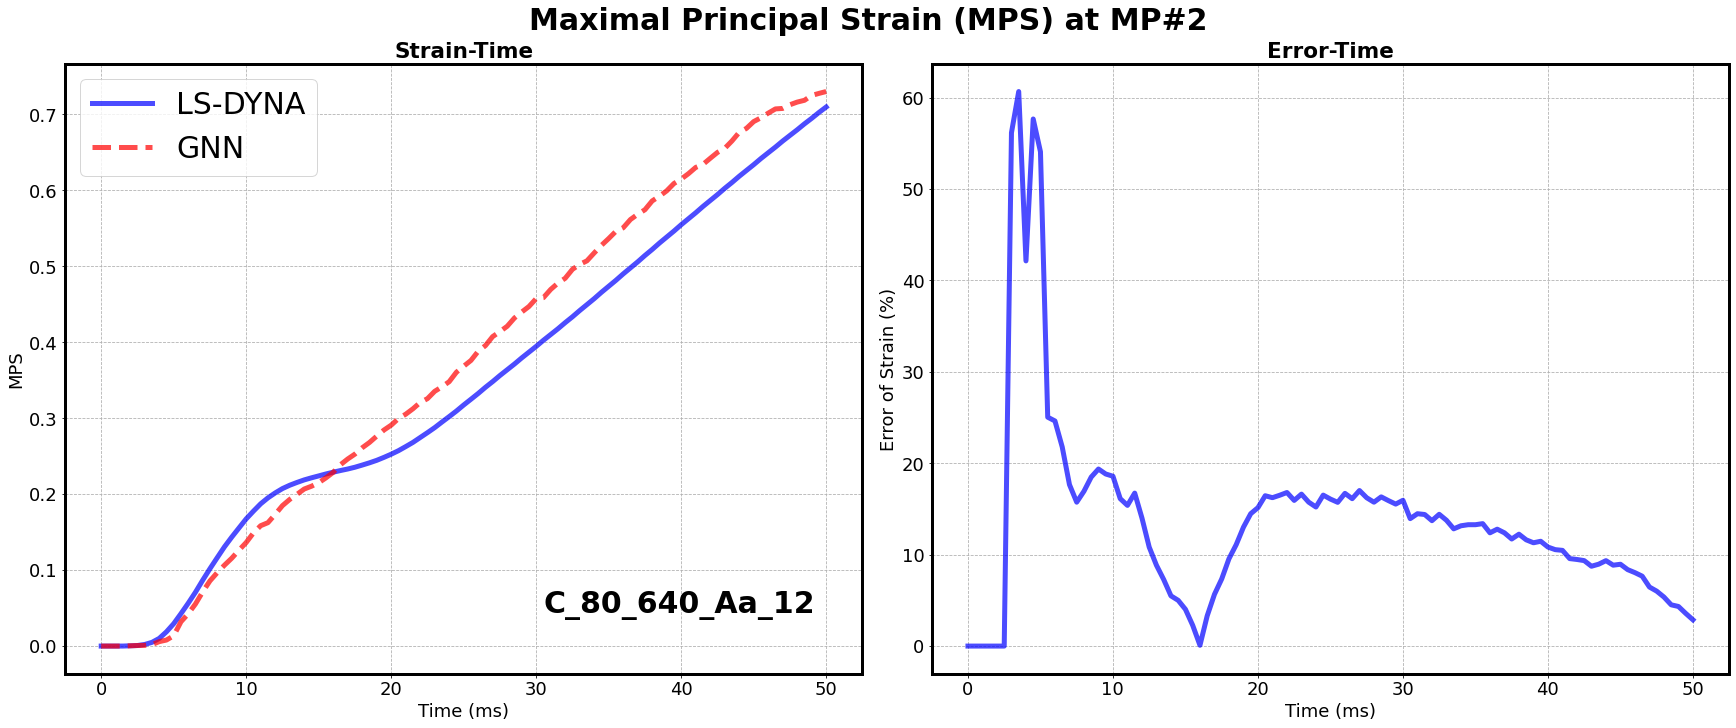

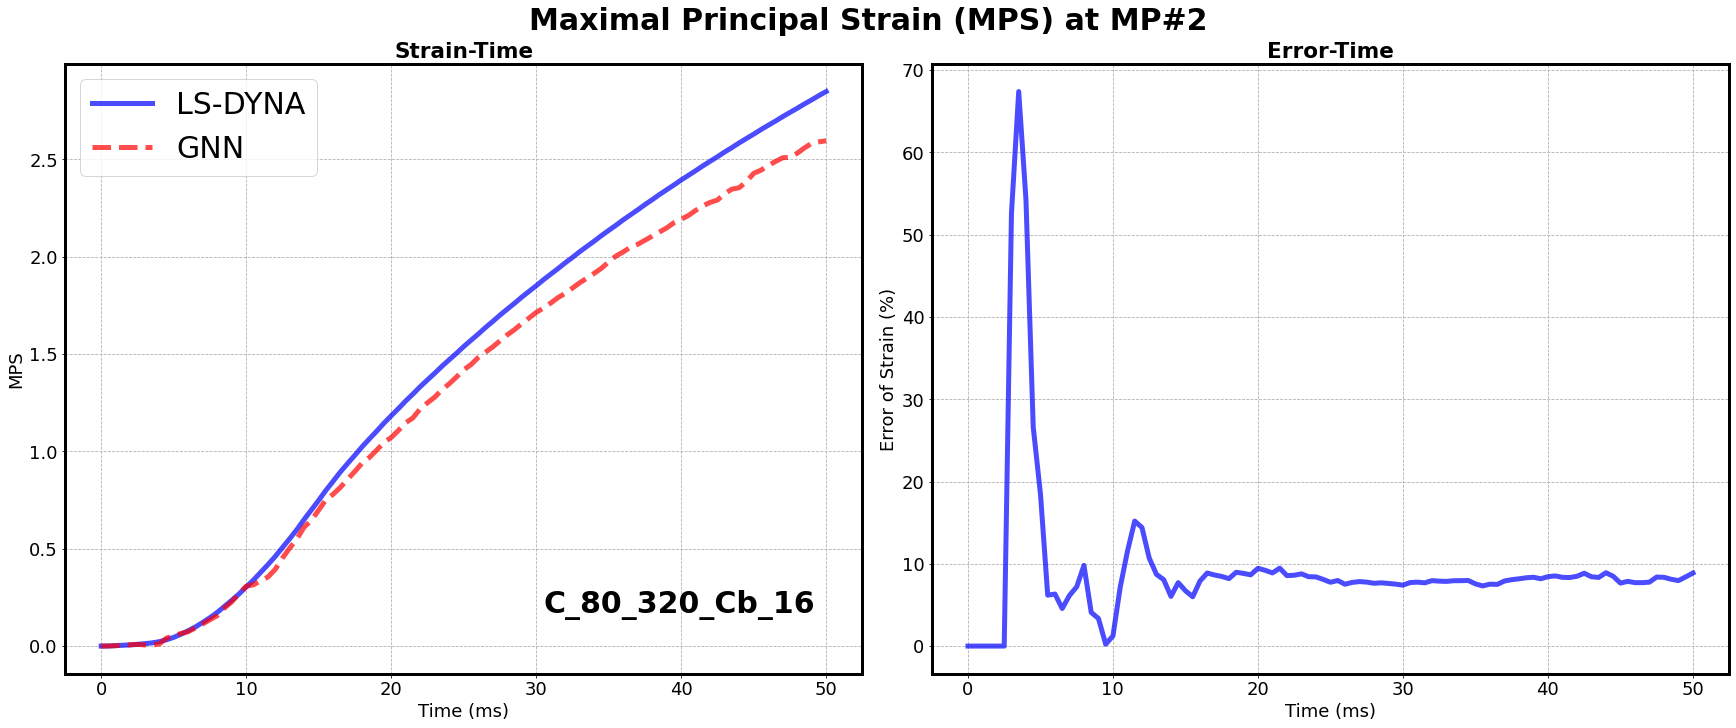

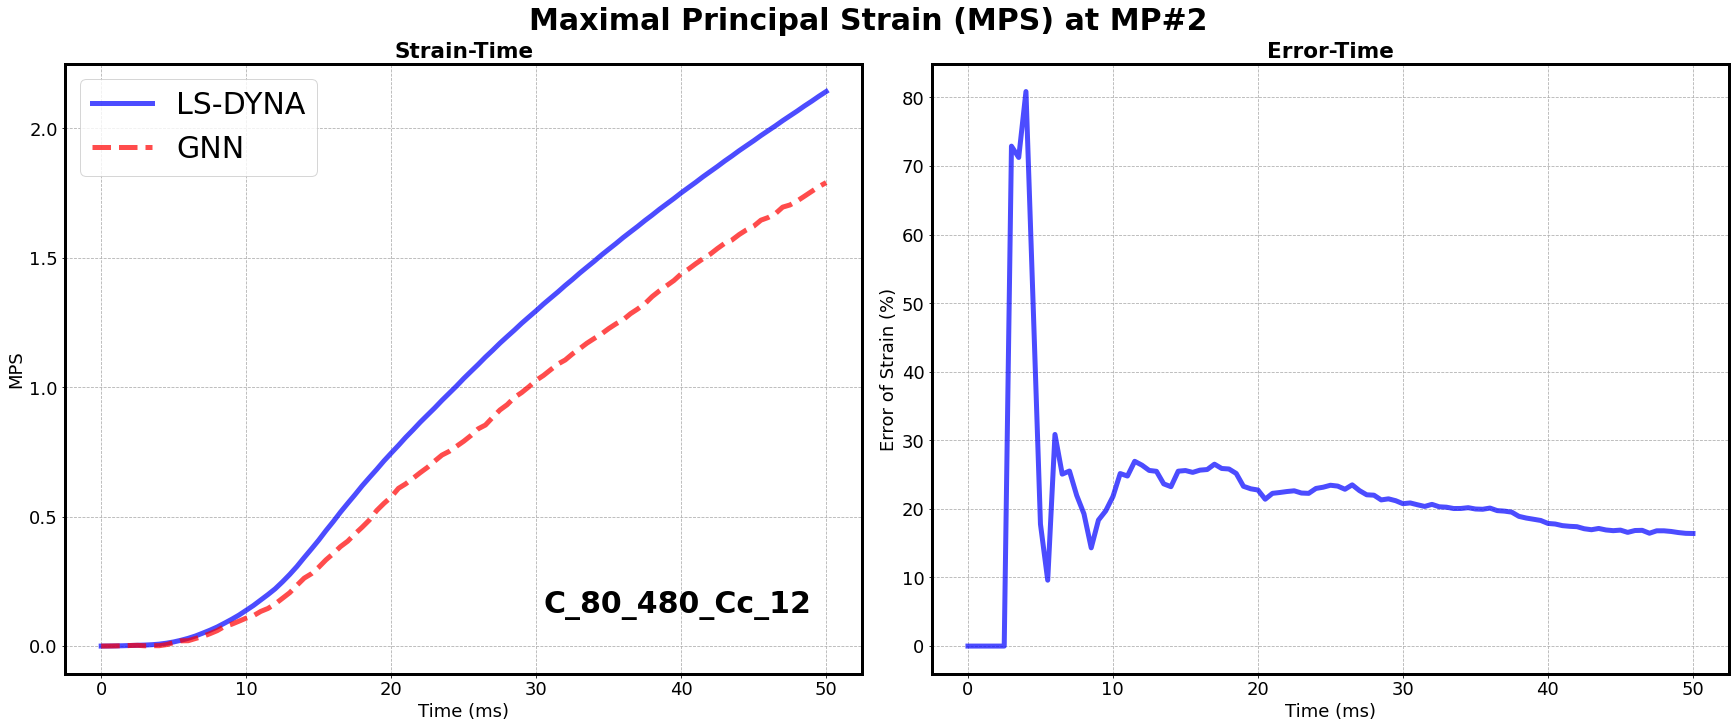

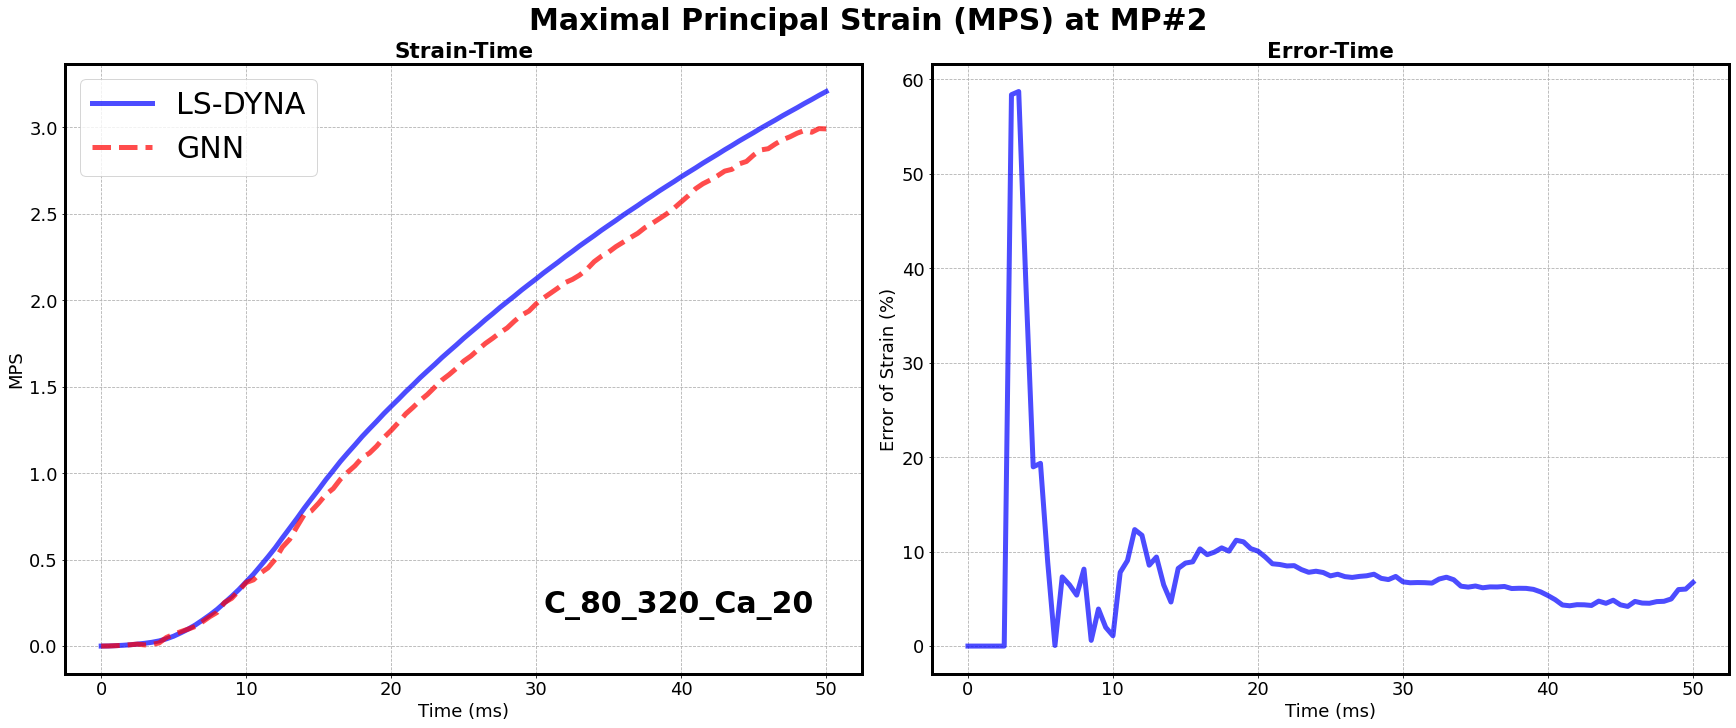

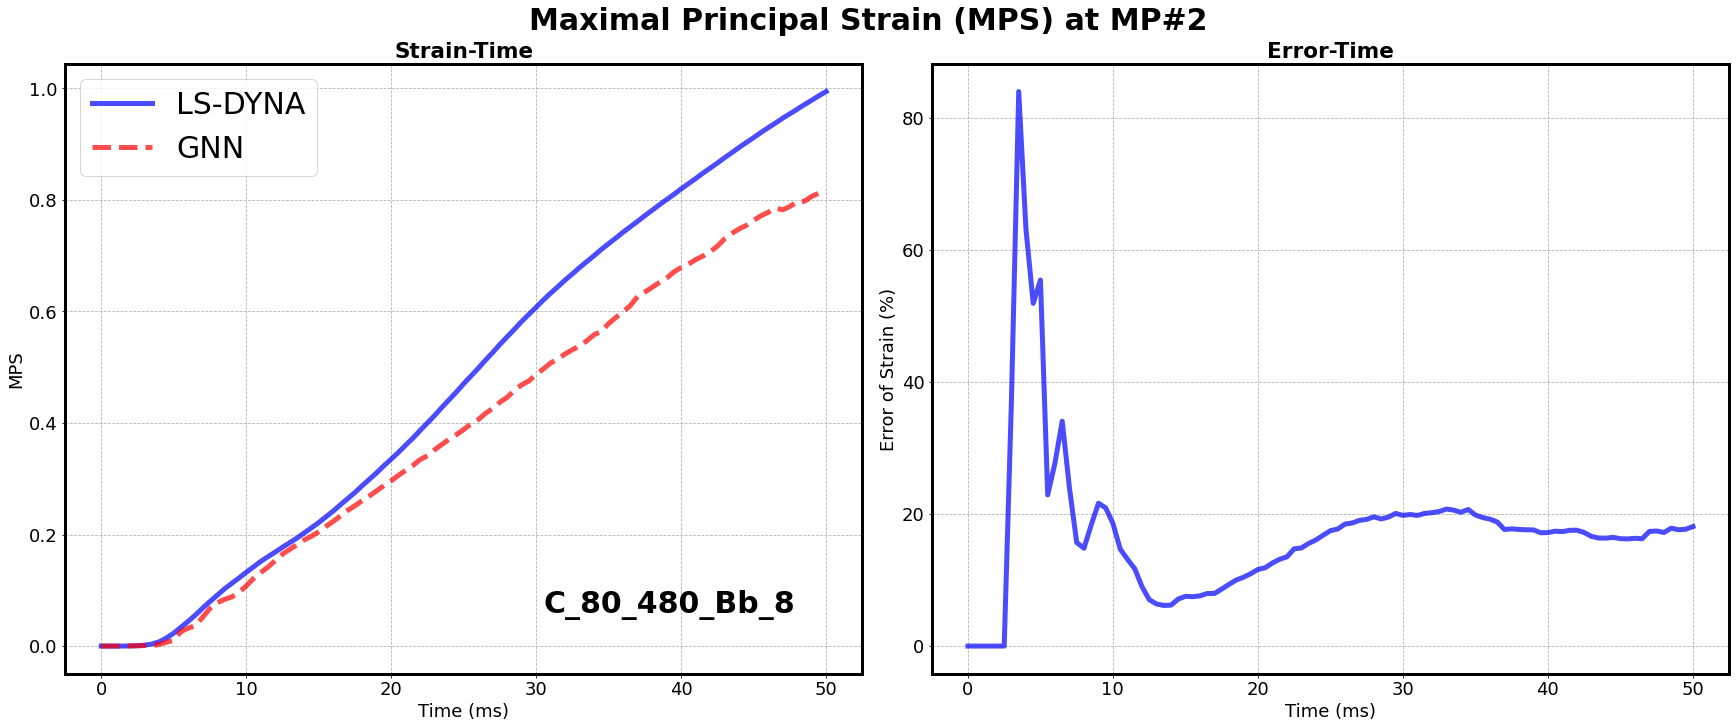

In [140]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

###############################
dataset = 'Concrete2D-C-mps'
###############################

STRAIN_MIN, STRAIN_MAX = 0, 2

MAX_I = np.array([325, 150])
MIN_I = np.array([-325, -30])
MAX_C = np.array([325, 95])
MIN_C = np.array([-325, -15])

## Id of particles of interest, either midspan or on top of notch
MID_SPAN_ID_320 = [2032, 2033, 2064, 2065] ## for 320
MID_SPAN_ID_480 = [3056, 3057, 3088, 3089] ## for 480
MID_SPAN_ID_640 = [4080, 4081, 4112, 4113] ## for 640

UP_NOTCH_ID = {'320a': [2021, 2022, 2053, 2054],
               '320b': [2533, 2534, 2565, 2566],
               '320c': [3045, 3046, 3077, 3078],
               '480a': [3045, 3046, 3077, 3078],
               '480b': [3813, 3814, 3845, 3846],
               '480c': [4581, 4582, 4613, 4614],
               '640a': [4069, 4070, 4101, 4102],
               '640b': [5093, 5094, 5125, 5126],
               '640c': [6117, 6118, 6149, 6150]
              }

for id in range(10):
    rollout_path = f"/home/jovyan/work/gns/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)

    simulation_name = rollout_data['metadata']['file_test'][id]
    
    if 'Concrete2D-C' in rollout_path:
        MAX, MIN = MAX_C, MIN_C
    else:
        MAX, MIN = MAX_I, MIN_I

    if '320' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_320
        L = 320
    elif '480' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_480
        L = 480
    elif '640' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_640
        L = 640
    else:
        print('sth wrong with the simulation name!')
    
    if 'mps' in dataset:
        for key, value in UP_NOTCH_ID.items():
            if key[:-1] in simulation_name and key[-1] in simulation_name:
                MID_SPAN_ID = value
          
    V = simulation_name.split('_')[-1]

    plot_info = []
    all_strain = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):
        
        if label == 'LS-DYNA':
            strain = rollout_data['ground_truth_strain']
            strain = strain * (STRAIN_MAX - STRAIN_MIN) + STRAIN_MIN
            all_strain[label] = strain
        else:
            strain = rollout_data['predicted_strain']
            strain = strain * (STRAIN_MAX - STRAIN_MIN) + STRAIN_MIN
            all_strain[label] = strain
    
    strain = all_strain['LS-DYNA']
    strain_mean = np.mean(strain, axis=0)
    max_strain_particles = strain_mean.argsort()
    mps_lsdyna = all_strain['LS-DYNA'][:, max_strain_particles[-10:]].mean(axis=1) 
    mps_gnn = all_strain['GNN'][:, max_strain_particles[-10:]].mean(axis=1)   
    
    # Plot
    num_steps = trajectory.shape[0]
    alpha = 0.7

    fig, axs = plt.subplots(1, 2, figsize=(24, 10), constrained_layout=True)
    title = 'Maximal Principal Strain (MPS) at MP#2' if 'mps' in dataset else 'Effective Plastic Strain (EPS) at Midspan'
    ylabel = 'MPS' if 'mps' in dataset else 'EPS'
    fig.suptitle(title, fontsize=30, fontweight='bold')
    
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['font.size'] = 18
    plt.rcParams['lines.markersize'] = 10
    
    axs[0].plot(np.linspace(0, 50, num_steps), mps_lsdyna, 'b-', alpha=alpha, label='LS-DYNA')
    axs[0].plot(np.linspace(0, 50, num_steps), mps_gnn, 'r--', alpha=alpha, label='GNN')

    axs[0].set_title(f'Strain-Time', fontweight='bold')
    axs[0].set_xlabel('Time (ms)')
    axs[0].set_ylabel(ylabel)
    axs[0].legend(['LS-DYNA', 'GNN'], prop={'size': 30})
    axs[0].grid(True, linestyle='--')
    axs[0].annotate(simulation_name, xy=(0, 1), xycoords='axes fraction', xytext=(0.6, 0.1), textcoords='axes fraction', fontsize=30, fontweight='bold')
    # axs[0].set_xlim([0, 32])
    # axs[0].set_ylim(ylim)
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[0].spines[axis].set_linewidth(3)

    ## Draw x-axis and y-axis with arrow    
    # axs[0].annotate('', xy=(0, 1), xycoords='axes fraction', xytext=(0, 0),textcoords='axes fraction', arrowprops=dict(arrowstyle= '-|>', color='k', lw=4, ls='-'))
    # axs[0].annotate('', xy=(1, 0.5), xycoords='axes fraction', xytext=(0, 0.5),textcoords='axes fraction', arrowprops=dict(arrowstyle= '-|>', color='k', lw=4, ls='-'))

    error = np.abs((mps_lsdyna - mps_gnn) / (mps_lsdyna+np.finfo(float).eps))

    # # Smooth error when gt = 0
    # idxs = np.abs(displacement_gt).argsort()[1:4]
    # for idx in idxs:
    #     for e in [e_gt_dyna, e_gt_gnn, e_dyna_gnn]:
    #         e[idx] = e[idx-2]/4 + e[idx-1]/4 + e[idx+1]/4 + e[idx+2]/4

    axs[1].plot(np.linspace(0, 50, num_steps), error*100, 'b-', alpha=alpha)

    axs[1].set_title('Error-Time', fontweight='bold')
    axs[1].set_xlabel('Time (ms)')
    axs[1].set_ylabel('Error of Strain (%)')
    axs[1].grid(True, linestyle='--')
    # axs[1].set_xlim([0, 32])
    # axs[1].set_ylim([-1, 10])
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[1].spines[axis].set_linewidth(3)
        
    # plt.savefig(f'2D_C_Midspan_EPS_{id}.png', pad_inches=0, dpi=300, bbox_inches='tight')

# Force-Deflection Curve

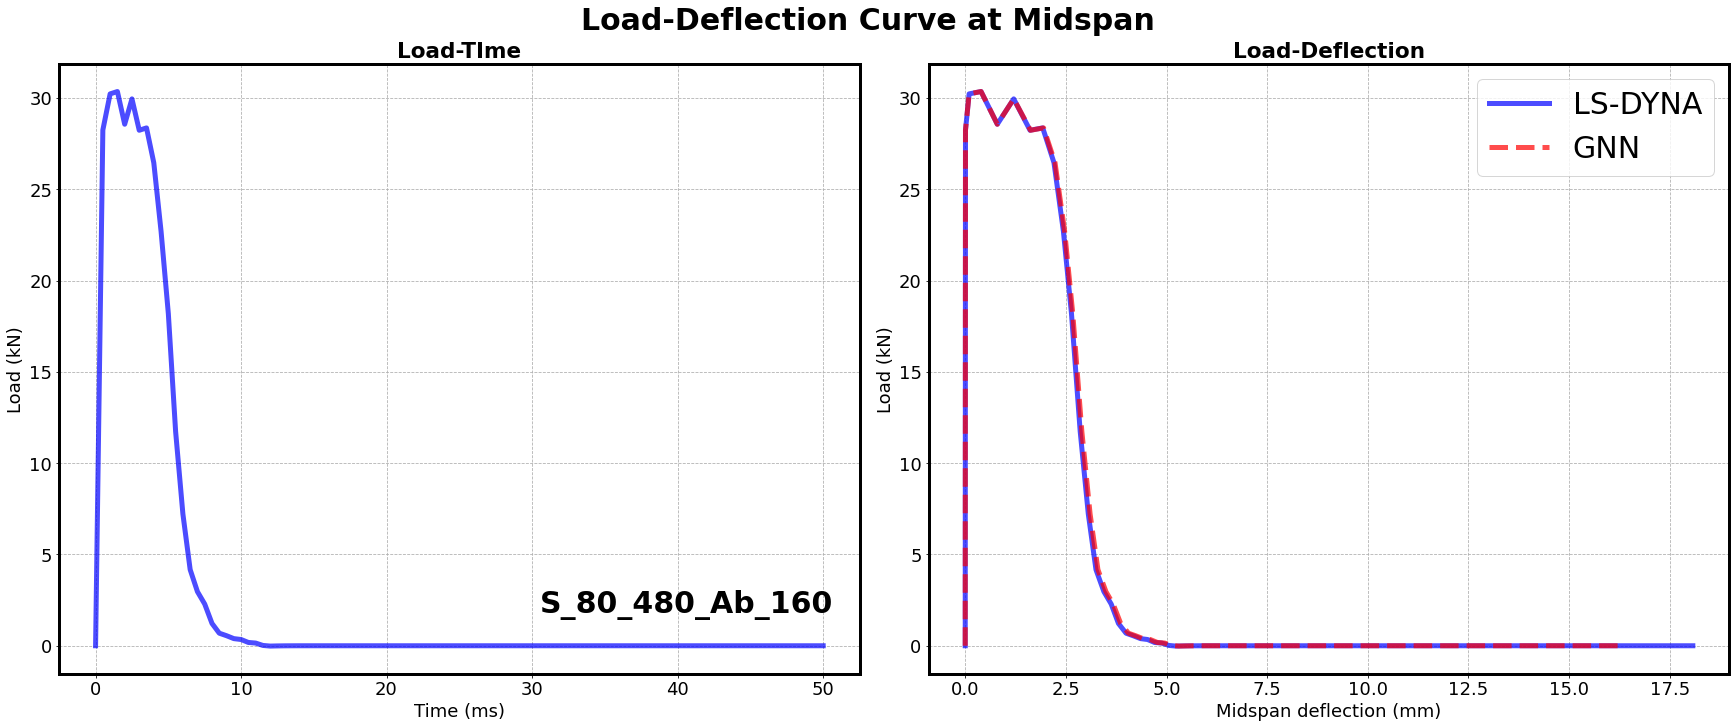

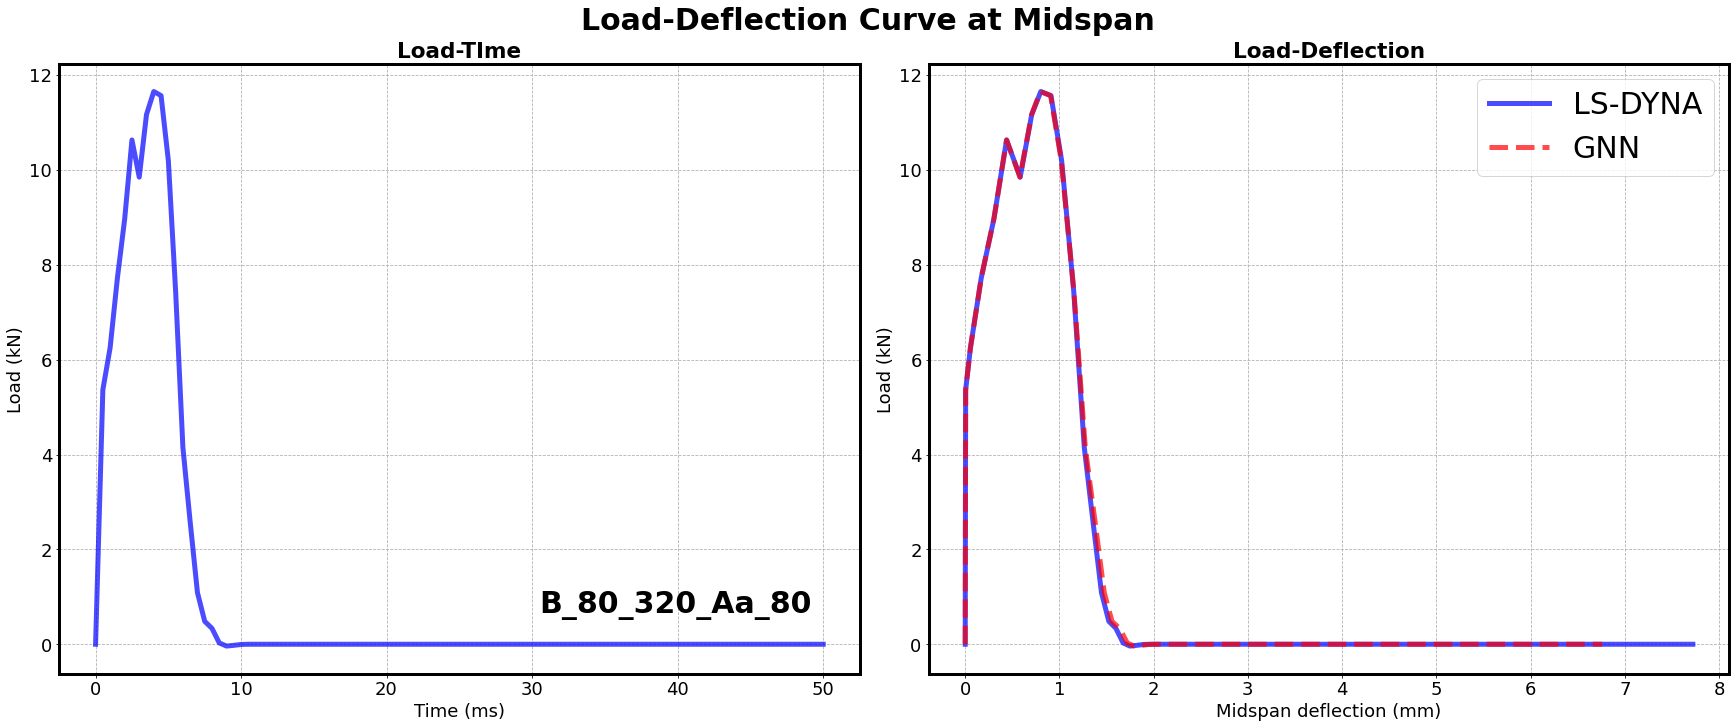

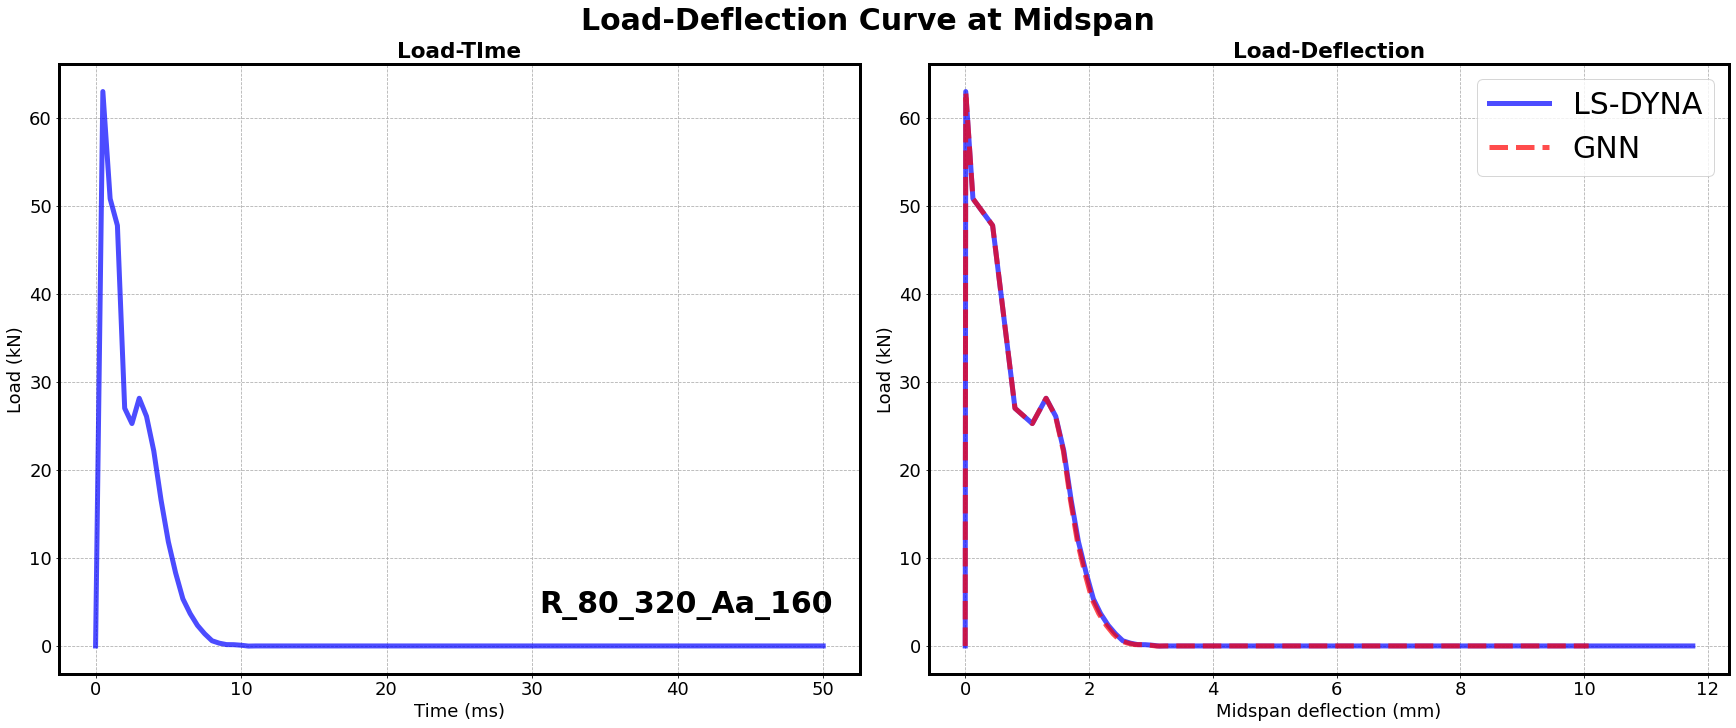

In [15]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

#########################
dataset = 'Concrete2D-I-mps'
#########################

MAX_I = np.array([325, 150])
MIN_I = np.array([-325, -30])
MAX_C = np.array([325, 95])
MIN_C = np.array([-325, -15])

MID_SPAN_ID_320 = [2032, 2033, 2064, 2065] ## for 320
MID_SPAN_ID_480 = [3056, 3057, 3088, 3089] ## for 480
MID_SPAN_ID_640 = [4080, 4081, 4112, 4113] ## for 640
    
# Read force-time data
file = '/home/jovyan/work/gns/data/Concrete2D-DYNA/force-time curve.xlsx'
STEP_SIZE = 5
df = pd.read_excel(file)

for id in range(8):
    rollout_path = f"/home/jovyan/work/gns/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)

    simulation_name = rollout_data['metadata']['file_test'][id]
    time = df['time'].to_numpy()
    force = df[simulation_name].to_numpy() / 1000 ## unit from N to kN 
    time = time[::STEP_SIZE]
    force = force[::STEP_SIZE]

    if 'Concrete2D-C' in rollout_path:
        MAX, MIN = MAX_C, MIN_C
    else:
        MAX, MIN = MAX_I, MIN_I
    y_scaling_factor = (MAX - MIN)[0] / (MAX - MIN)[1]
    
    if '320' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_320
        L = 320
    elif '480' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_480
        L = 480
    elif '640' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_640
        L = 640
    else:
        print('sth wrong with the simulation name!')
    V = simulation_name.split('_')[-1]

    plot_info = []
    mid_node = {}
    mid_node_strain = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):

        trajectory = np.concatenate([
            rollout_data["initial_positions"],
            rollout_data[rollout_field]], axis=0)
        trajectory[:,:,1] = trajectory[:,:,1] * y_scaling_factor # if xy-scaled
        trajectory = trajectory * (MAX - MIN) + MIN ## inverse normalisation

        mid_node[label] = np.mean(trajectory[:, MID_SPAN_ID,:], axis=1)  # average of 5 particles on the free-end

    deflection_lydyna = mid_node['LS-DYNA'][0, 1] - mid_node['LS-DYNA'][:, 1]
    deflection_gnn = mid_node['GNN'][0, 1] - mid_node['GNN'][:, 1]

    # Plot
    num_steps = trajectory.shape[0]
    alpha = 0.7

    fig, axs = plt.subplots(1, 2, figsize=(24, 10), constrained_layout=True)
    fig.suptitle('Load-Deflection Curve at Midspan', fontsize=30, fontweight='bold')
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['font.size'] = 18


    ## Draw x-axis and y-axis with arrow    
    # axs[0].annotate('', xy=(0, 1), xycoords='axes fraction', xytext=(0, 0),textcoords='axes fraction', arrowprops=dict(arrowstyle= '-|>', color='k', lw=4, ls='-'))
    # axs[0].annotate('', xy=(1, 0.5), xycoords='axes fraction', xytext=(0, 0.5),textcoords='axes fraction', arrowprops=dict(arrowstyle= '-|>', color='k', lw=4, ls='-'))

    axs[0].plot(np.linspace(0, 50, num_steps), force, 'b-', alpha=alpha)
    axs[0].set_title('Load-TIme', fontweight='bold')
    axs[0].set_xlabel('Time (ms)')
    axs[0].set_ylabel('Load (kN)')
    axs[0].grid(True, linestyle='--')
    axs[0].annotate(simulation_name, xy=(0, 1), xycoords='axes fraction', xytext=(0.6, 0.1), textcoords='axes fraction', fontsize=30, fontweight='bold')
    # axs[1].set_xlim([0, 32])
    # axs[1].set_ylim([-1, 10])
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[0].spines[axis].set_linewidth(3)
    
    axs[1].plot(deflection_lydyna, force, 'b-', alpha=alpha, label='LS-DYNA')
    axs[1].plot(deflection_gnn, force, 'r--', alpha=alpha, label='GNN')
    axs[1].set_title(f'Load-Deflection', fontweight='bold')
    axs[1].set_xlabel('Midspan deflection (mm)')
    axs[1].set_ylabel('Load (kN)')
    axs[1].legend(['LS-DYNA', 'GNN'], prop={'size': 30})
    axs[1].grid(True, linestyle='--')
    # axs[2].set_xlim([0, 0.2])
    for axis in ['top','bottom','left','right']:
        axs[1].spines[axis].set_linewidth(3)
    
    # plt.savefig(f'2D_Midspan_deflection_{id}.png', pad_inches=0, dpi=300, bbox_inches='tight')

# Force-Strain (MPS) Curve

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

###############################
dataset = 'Concrete2D-I-mps'
###############################

STRAIN_MIN, STRAIN_MAX = 0, 2

MAX_I = np.array([325, 150])
MIN_I = np.array([-325, -30])
MAX_C = np.array([325, 95])
MIN_C = np.array([-325, -15])

## Id of particles of interest, either midspan or on top of notch
MID_SPAN_ID_320 = [2032, 2033, 2064, 2065] ## for 320
MID_SPAN_ID_480 = [3056, 3057, 3088, 3089] ## for 480
MID_SPAN_ID_640 = [4080, 4081, 4112, 4113] ## for 640

UP_NOTCH_ID = {'320a': [2021, 2022, 2053, 2054],
               '320b': [2533, 2534, 2565, 2566],
               '320c': [3045, 3046, 3077, 3078],
               '480a': [3045, 3046, 3077, 3078],
               '480b': [3813, 3814, 3845, 3846],
               '480c': [4581, 4582, 4613, 4614],
               '640a': [4069, 4070, 4101, 4102],
               '640b': [5093, 5094, 5125, 5126],
               '640c': [6117, 6118, 6149, 6150]
              }

# Read force-time data
file = '/home/jovyan/work/gns/data/Concrete2D-DYNA/force-time curve.xlsx'
STEP_SIZE = 5
df = pd.read_excel(file)

for id in range(8):
    rollout_path = f"/home/jovyan/work/gns/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)

    simulation_name = rollout_data['metadata']['file_test'][id]
    
    time = df['time'].to_numpy()
    force = df[simulation_name].to_numpy() / 1000 ## unit from N to kN 
    time = time[::STEP_SIZE]
    force = force[::STEP_SIZE]
    
    if 'Concrete2D-C' in rollout_path:
        MAX, MIN = MAX_C, MIN_C
    else:
        MAX, MIN = MAX_I, MIN_I

    if '320' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_320
        L = 320
    elif '480' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_480
        L = 480
    elif '640' in simulation_name:
        MID_SPAN_ID = MID_SPAN_ID_640
        L = 640
    else:
        print('sth wrong with the simulation name!')
    
    if 'mps' in dataset:
        for key, value in UP_NOTCH_ID.items():
            if key[:-1] in simulation_name and key[-1] in simulation_name:
                MID_SPAN_ID = value
          
    V = simulation_name.split('_')[-1]

    plot_info = []
    mid_node_strain = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):

        trajectory = np.concatenate([
            rollout_data["initial_positions"],
            rollout_data[rollout_field]], axis=0)

        trajectory = trajectory * (MAX - MIN) + MIN ## inverse normalisation
        
        if label == "LS-DYNA":
            strain = np.mean(rollout_data["ground_truth_strain"][:, MID_SPAN_ID], axis=1)
        elif label == "GNN":
            strain = np.mean(rollout_data["predicted_strain"][:, MID_SPAN_ID], axis=1)
            
        strain = strain * (STRAIN_MAX - STRAIN_MIN) + STRAIN_MIN
        mid_node_strain[label] = strain   

    # Plot
    num_steps = trajectory.shape[0]
    alpha = 0.7

    fig, axs = plt.subplots(1, 2, figsize=(24, 10), constrained_layout=True)
    title = "Load-Strain Curve above Notch"
    ylabel = 'MPS' if 'mps' in dataset else 'EPS'
    fig.suptitle(title, fontsize=30, fontweight='bold')
    
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['font.size'] = 18
    plt.rcParams['lines.markersize'] = 10

    axs[0].plot(np.linspace(0, 50, num_steps), force, 'b-', alpha=alpha)
    axs[0].set_title('Load-Time', fontweight='bold')
    axs[0].set_xlabel('Time (ms)')
    axs[0].set_ylabel('Load (kN)')
    axs[0].grid(True, linestyle='--')
    axs[0].annotate(simulation_name, xy=(0, 1), xycoords='axes fraction', xytext=(0.6, 0.1), textcoords='axes fraction', fontsize=30, fontweight='bold')
    # Draw boundary
    for axis in ['top','bottom','left','right']:
        axs[0].spines[axis].set_linewidth(3)
        
        
    axs[1].plot(mid_node_strain['LS-DYNA'], force, 'b-', alpha=alpha, label='LS-DYNA')
    axs[1].plot(mid_node_strain['GNN'], force, 'r--', alpha=alpha, label='GNN')
    axs[1].set_title(f'Load-Strain', fontweight='bold')
    axs[1].set_xlabel('Strain')
    axs[1].set_ylabel('Load (kN)')
    axs[1].legend(['LS-DYNA', 'GNN'], prop={'size': 30})
    axs[1].grid(True, linestyle='--')
    axs[1].set_xlim([-0.01, 0.3])
    for axis in ['top','bottom','left','right']:
        axs[1].spines[axis].set_linewidth(3)
    # plt.savefig(f'2D_C_Midspan_EPS_{id}.png', pad_inches=0, dpi=300, bbox_inches='tight')

# Taylor Impact Test - Position Contour

(100, 316, 2)
(100, 396, 2)
(100, 476, 2)


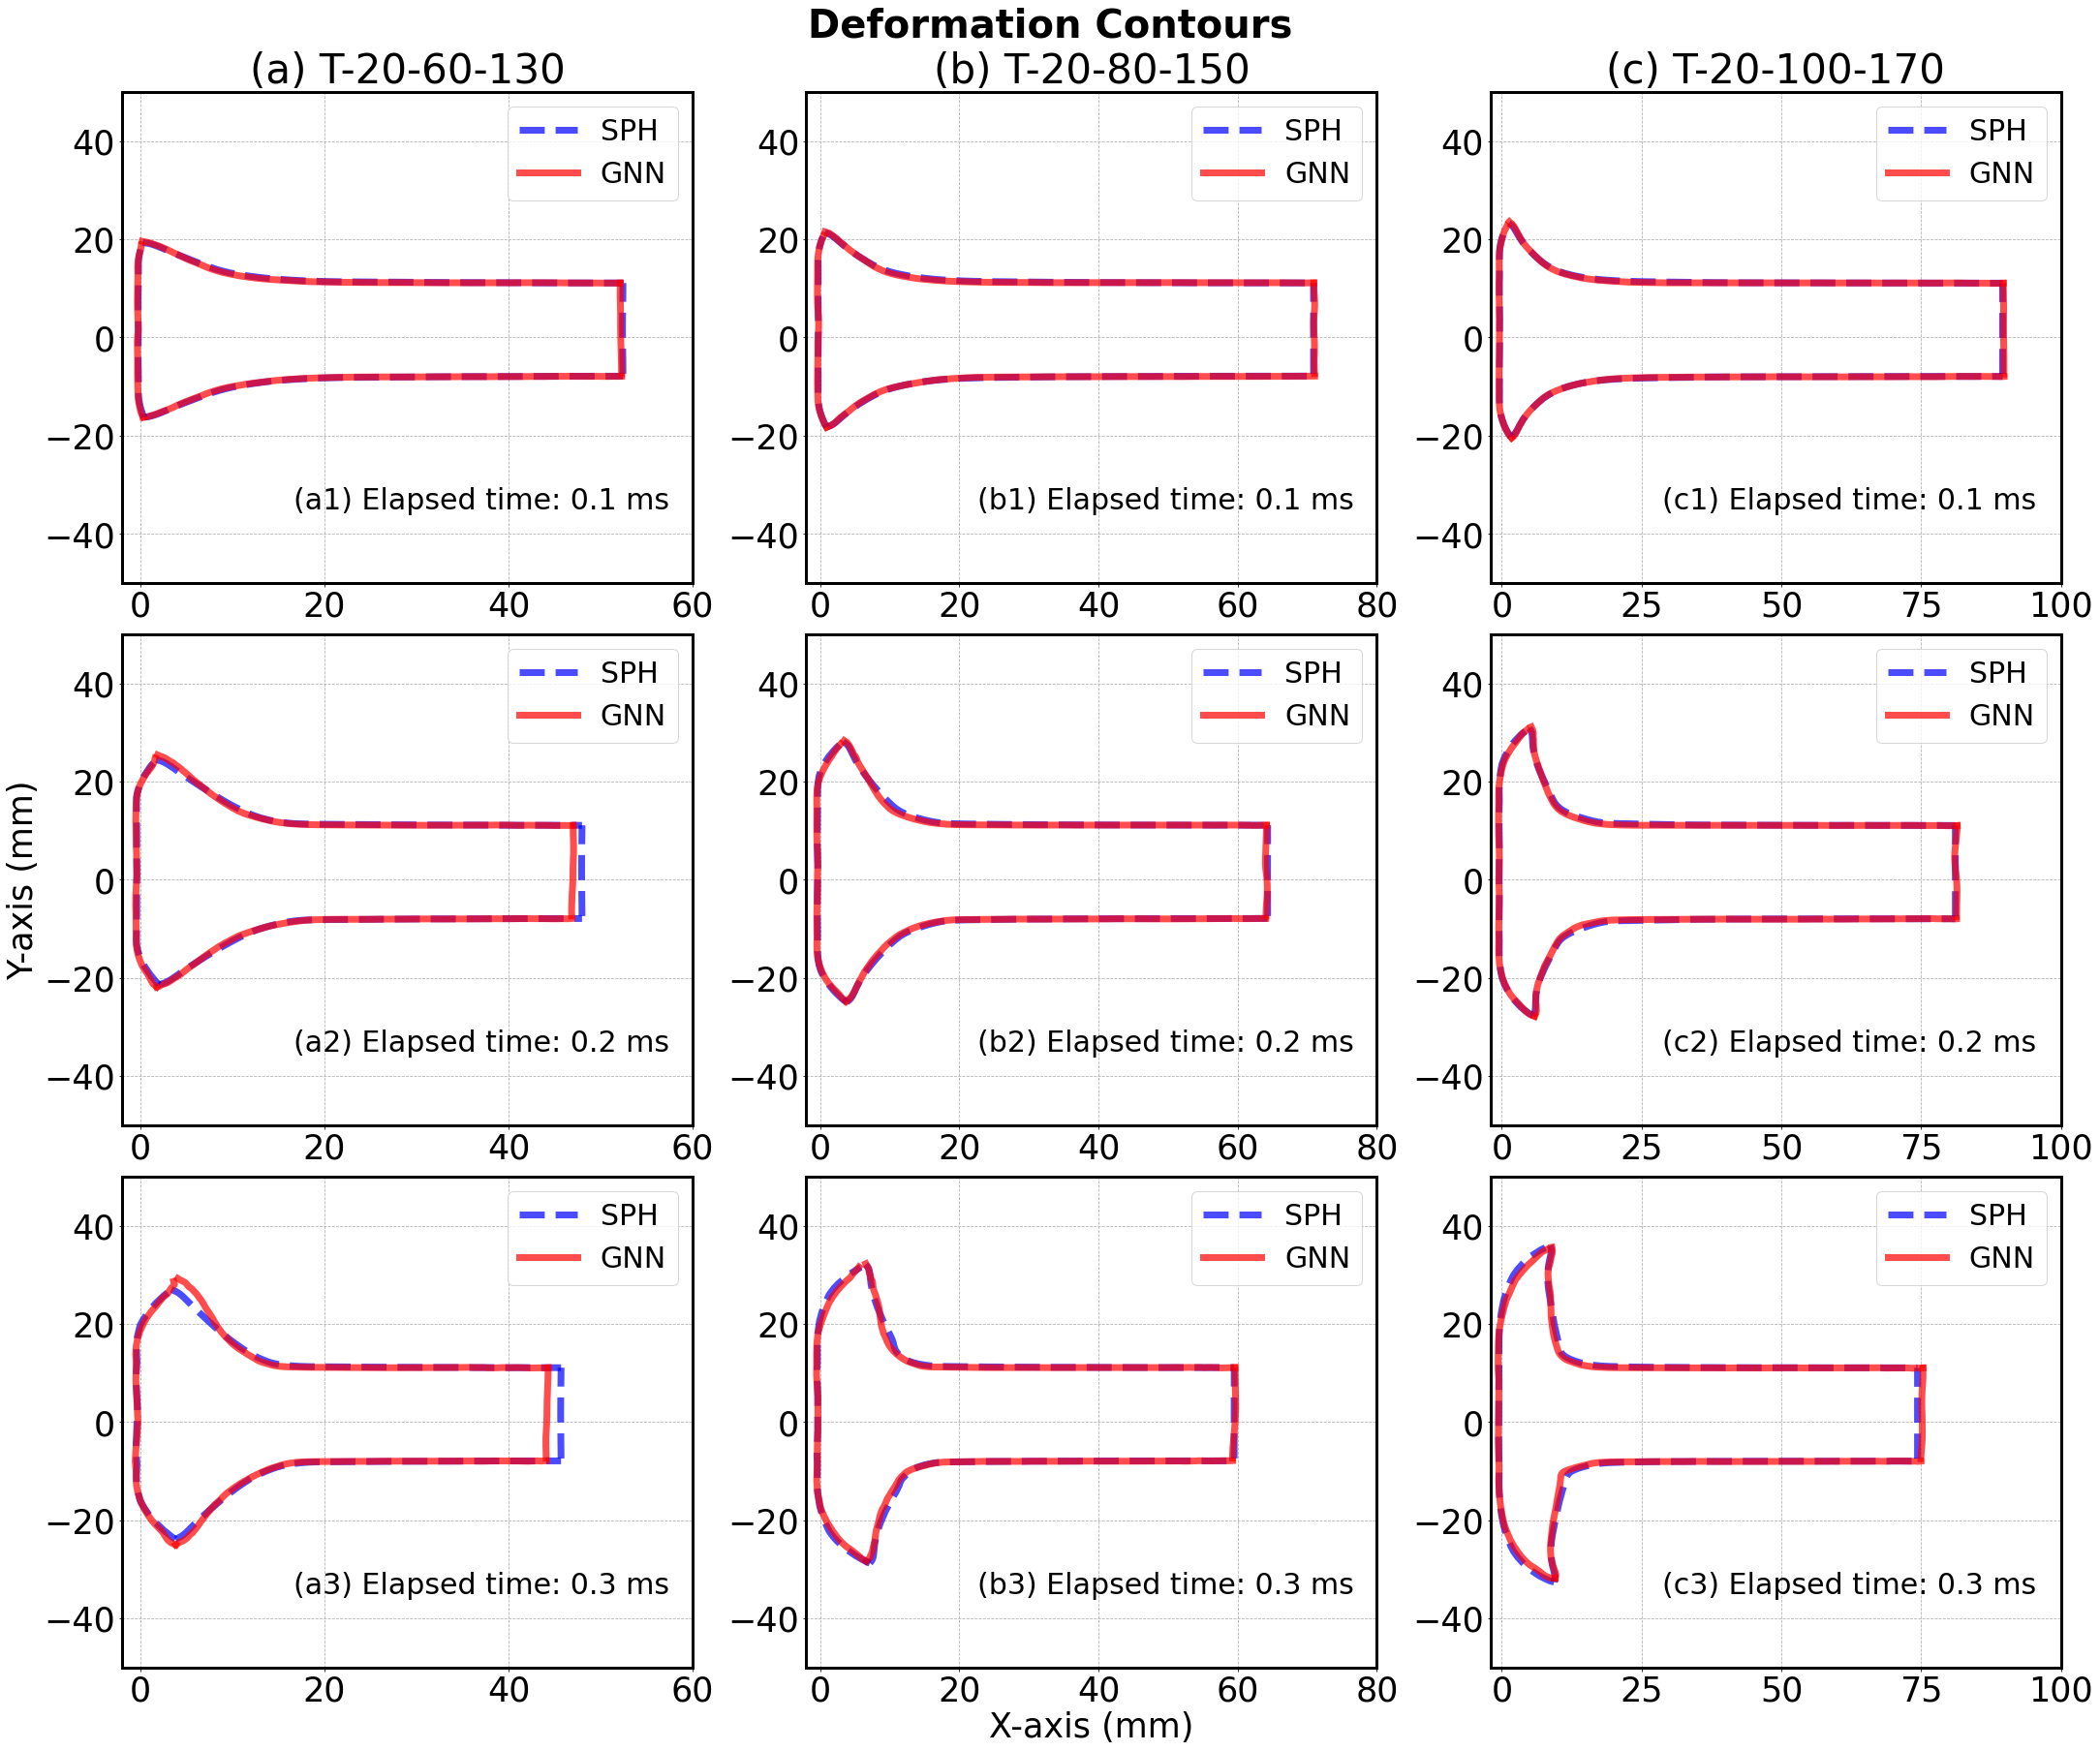

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#########################
dataset = 'Concrete2D-T-Step1'
#########################

# Fig
alpha = 0.7
fig, axs = plt.subplots(3, 3, figsize=(30, 25), constrained_layout=True)
fig.suptitle('Deformation Contours', fontsize=40, fontweight='bold')
plt.rcParams['lines.linewidth'] = 7
plt.rcParams['font.size'] = 35
    
## Normalisation parameters
pos_max, pos_min = np.array([100, 50]), np.array([-2.5, -50])
strain_mean, strain_std = 143.09920564186177, 86.05175002337249  # vms stats pre-computed from data

# Pre-define boundar particle id based on LS-DYNA keyword file
BOUNDARY_ID_60 = np.arange(1, 4800, 40)   # bottom
BOUNDARY_ID_60 = np.concatenate((BOUNDARY_ID_60,             # bottom 1
                                 np.arange(39, 4800, 40),    # top 1
                                 np.arange(1, 39, 1),        # left 1
                                 np.arange(4762, 4800, 1),   # right 1
                                ))

BOUNDARY_ID_80 = np.arange(1, 6400, 40)   # bottom
BOUNDARY_ID_80 =np.concatenate((BOUNDARY_ID_80,                   # bottom 1
                                np.arange(39, 6400, 40),    # top 1
                                np.arange(1, 39, 1),        # left 1
                                np.arange(6362, 6400, 1),   # right 1
                               ))

BOUNDARY_ID_100 = np.arange(1, 8000, 40)   # bottom
BOUNDARY_ID_100 = np.concatenate((BOUNDARY_ID_100,                  # bottom 1
                                  np.arange(39, 8000, 40),    # top 1
                                  np.arange(1, 39, 1),        # left 1
                                  np.arange(7962, 8000, 1),   # right 1
                                 ))

for figID, id in enumerate([1, 2, 0]):
    rollout_path = f"/home/jovyan/work/gns_1GPU/rollouts/{dataset}/rollout_{id}.pkl"

    with open(rollout_path, "rb") as file:
        rollout_data = pickle.load(file)
    simulation_name = rollout_data['metadata']['file_test'][id]
    
    boundary_traj = {}
    for ax_i, (label, rollout_field) in enumerate(
      [("LS-DYNA", "ground_truth_rollout"),
       ("GNN", "predicted_rollout")]):

        trajectory = np.concatenate([
            rollout_data["initial_positions"],
            rollout_data[rollout_field]], axis=0)
        trajectory = trajectory * (pos_max - pos_min) + pos_min ## inverse normalisation
        
        if trajectory.shape[1] == 4800:
            boundary_traj[label] = trajectory[:, BOUNDARY_ID_60-1,:]
        elif trajectory.shape[1] == 6400:
            boundary_traj[label] = trajectory[:, BOUNDARY_ID_80-1,:]
        elif trajectory.shape[1] == 8000:
            boundary_traj[label] = trajectory[:, BOUNDARY_ID_100-1,:]
        else:
            print("Something wrong with the number of particles")
            
        if label == 'LS-DYNA':
            init_pos_alignment = boundary_traj['LS-DYNA'][0, :, 0].min()
        boundary_traj[label] -= init_pos_alignment
            
    # Plot
    print(boundary_traj['GNN'].shape)
    steps = [30, 60, 90]
    row_prefix = ['a', 'b', 'c']
    col_prefix = ['1', '2', '3']
    time = [0.1, 0.2, 0.3]
    xlim = [60, 80, 100]
    bottom = [len(np.arange(1, 4800, 40)), len(np.arange(1, 6400, 40)), len(np.arange(1, 8000, 40))]
    top = [len(np.arange(39, 4800, 40)), len(np.arange(39, 6400, 40)), len(np.arange(39, 8000, 40))]
    left = len(np.arange(1, 39, 1))
    right = [len(np.arange(4762, 4800, 1)), len(np.arange(6362, 6400, 1)), len(np.arange(7962, 8000, 1))]
    
    axs[0, 0].set_title('(a) T-20-60-130')
    axs[0, 1].set_title('(b) T-20-80-150')  
    axs[0, 2].set_title('(c) T-20-100-170')
    for idx, step in enumerate(steps):
        # axs[figID, idx].plot(boundary_traj['LS-DYNA'][step, ::1, 0], boundary_traj['LS-DYNA'][step, ::1, 1], 'b--', alpha=alpha, label='SPH')
        # axs[figID, idx].plot(boundary_traj['GNN'][step, ::1, 0], boundary_traj['GNN'][step, ::1, 1], 'r-', alpha=alpha, label='GNN')
        axs[idx,figID].plot(boundary_traj['LS-DYNA'][step, :bottom[figID], 0], boundary_traj['LS-DYNA'][step, :bottom[figID], 1], 'b--', alpha=alpha, label='SPH')
        axs[idx,figID].plot(boundary_traj['GNN'][step, :bottom[figID], 0], boundary_traj['GNN'][step, :bottom[figID], 1], 'r-', alpha=alpha, label='GNN')
        
        axs[idx,figID].plot(boundary_traj['LS-DYNA'][step, bottom[figID]:bottom[figID]+top[figID], 0], boundary_traj['LS-DYNA'][step, bottom[figID]:bottom[figID]+top[figID], 1], 'b--', alpha=alpha, label='SPH1')
        axs[idx,figID].plot(boundary_traj['LS-DYNA'][step, bottom[figID]+top[figID]:bottom[figID]+top[figID]+left, 0], boundary_traj['LS-DYNA'][step, bottom[figID]+top[figID]:bottom[figID]+top[figID]+left, 1], 'b--', alpha=alpha, label='SPH2')
        axs[idx,figID].plot(boundary_traj['LS-DYNA'][step, bottom[figID]+top[figID]+left:bottom[figID]+top[figID]+left+right[figID], 0], boundary_traj['LS-DYNA'][step, bottom[figID]+top[figID]+left:bottom[figID]+top[figID]+left+right[figID], 1], 'b--', alpha=alpha, label='SPH3')
        
        axs[idx,figID].plot(boundary_traj['GNN'][step, bottom[figID]:bottom[figID]+top[figID], 0], boundary_traj['GNN'][step, bottom[figID]:bottom[figID]+top[figID], 1], 'r-', alpha=alpha, label='GNN1')
        axs[idx,figID].plot(boundary_traj['GNN'][step, bottom[figID]+top[figID]:bottom[figID]+top[figID]+left, 0], boundary_traj['GNN'][step, bottom[figID]+top[figID]:bottom[figID]+top[figID]+left, 1], 'r-', alpha=alpha, label='GNN2')
        axs[idx,figID].plot(boundary_traj['GNN'][step, bottom[figID]+top[figID]+left:bottom[figID]+top[figID]+left+right[figID], 0], boundary_traj['GNN'][step, bottom[figID]+top[figID]+left:bottom[figID]+top[figID]+left+right[figID], 1], 'r-', alpha=alpha, label='GNN3')
        
        simulation_name = simulation_name.replace('_', '-')
        
        msg1 = f'({row_prefix[figID]}{col_prefix[idx]}) {simulation_name}'
        msg2 = f'({row_prefix[figID]}{col_prefix[idx]}) Elapsed time: {time[idx]} ms'
        # axs[figID,idx].set_title(f'{simulation_name}',pad=10)
        axs[idx,figID].set_xlim([-2, xlim[figID]])
        axs[idx,figID].set_ylim([-50, 50])
        axs[2, 1].set_xlabel('X-axis (mm)')
        axs[1, 0].set_ylabel('Y-axis (mm)')
        axs[idx,figID].legend(['SPH', 'GNN'], prop={'size': 30})
        axs[idx,figID].grid(True, linestyle='--')
        #axs[idx,figID].annotate(msg1, xy=(0, 1), xycoords='axes fraction', xytext=(0.35, 0.2), textcoords='axes fraction', fontsize=30)
        axs[idx,figID].annotate(msg2, xy=(0, 1), xycoords='axes fraction', xytext=(0.3, 0.15), textcoords='axes fraction', fontsize=30)
        
        # axs[0].set_xlim([0, 32])
        # axs[0].set_ylim(ylim)
        # Draw boundary
        for axis in ['top','bottom','left','right']:
            axs[idx,figID].spines[axis].set_linewidth(3)
    
#plt.savefig(f'Deformation contours.png', pad_inches=0, dpi=300, bbox_inches='tight')

In [53]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt

## Normalisation parameters
pos_max, pos_min = np.array([100, 50]), np.array([-2.5, -50])
strain_mean, strain_std = 143.09920564186177, 86.05175002337249  # vms stats pre-computed from data

plt.rcParams['lines.linewidth'] = 5
plt.rcParams['font.size'] = 35
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['lines.markersize'] = 10

fig, ax = plt.subplots(1, 2, figsize=(20, 9), constrained_layout=True)
fig.suptitle('Time History of MAPE', fontsize=40, fontweight='bold')

datasets = ['Concrete2D-T-Step1']
steps = 100
all_losses = {'pos': {}, 'vms': {}, 'pos_std': {}, 'vms_std': {}}
for dataset in datasets:
    in_dir = f'/home/jovyan/work/gns_1GPU/rollouts/{dataset}/'
    
    rollouts = glob.glob(in_dir + '*.pkl')       
        
    losses_timestep_pos = np.array([]).reshape(steps, 0)
    losses_timestep_pos_std = np.array([]).reshape(steps, 0)
    losses_timestep_strain = np.array([]).reshape(steps, 0)
    losses_timestep_strain_std = np.array([]).reshape(steps, 0)
    
    for rollout in rollouts:
        with open(rollout, "rb") as file:
            rollout_data = pickle.load(file)


        displacement = {}
        for (label, rollout_field) in[("LS-DYNA", "ground_truth_rollout"), ("GNN", "predicted_rollout")]:

            # Append the initial positions to get the full trajectory.
            trajectory = np.concatenate([
                rollout_data["initial_positions"],
                rollout_data[rollout_field]], axis=0)
            trajectory = trajectory * (pos_max - pos_min) + pos_min ## qilin 
            displacement[label] = trajectory - trajectory[0, :, :]
        
        # rmse = np.sqrt((pos['LS-DYNA'] - pos['GNN'])**2).mean(axis=(1,2))
        mape = abs((displacement['LS-DYNA'] - displacement['GNN']) / (displacement['LS-DYNA'] + 1e-8))
        mape_masked = np.ma.masked_where((mape > 0.5) | (displacement['LS-DYNA'] < 1) , mape)  # masked out those with 100% error due to numerical instability
        mape_masked_mean = mape_masked.mean(axis=(1,2))
        loss_timestep = mape_masked_mean
       
        losses_timestep_pos = np.concatenate((losses_timestep_pos, loss_timestep.reshape(-1,1)), axis=1)
        
        strains = {}
        for (label, rollout_field) in[("LS-DYNA", "ground_truth_strain"), ("GNN", "predicted_strain")]:

            # Append the initial positions to get the full trajectory.
            strain = np.concatenate([
                rollout_data["initial_strains"],
                rollout_data[rollout_field]], axis=0)
            strain = strain * strain_std + strain_mean   ## inverse normalisation
            strains[label] = strain
            
        #rmse = np.sqrt((strains['LS-DYNA'] - strains['GNN'])**2).mean(axis=1)
        mape = abs((strains['LS-DYNA'] - strains['GNN']) / (strains['LS-DYNA'] + 1e-8))
        mape_masked = np.ma.masked_where((mape > 0.5) | (strains['LS-DYNA'] < 50), mape)  # masked out those with 500% error due to numerical instability
        mape_masked_mean = mape_masked.mean(axis=1)
        loss_timestep = mape_masked_mean
        
        losses_timestep_strain = np.concatenate((losses_timestep_strain, loss_timestep.reshape(-1,1)), axis=1)
    
    # Average over rollouts in a dataset
    all_losses['pos'][dataset] = losses_timestep_pos.mean(axis=1)  
    all_losses['pos_std'][dataset] = losses_timestep_pos.std(axis=1)
    
    all_losses['vms'][dataset] = losses_timestep_strain.mean(axis=1)
    all_losses['vms_std'][dataset] = losses_timestep_strain.std(axis=1) 

idx = 0 
y1 = all_losses['pos']['Concrete2D-T-Step1']
ind = sum(y1 == 0)
y1 = y1[ind-2:]
x1 = np.linspace(0, steps, y1.shape[0])
error1 = all_losses['pos_std']['Concrete2D-T-Step1'][ind-2:]
ax[idx].plot(x1, y1*100, 'r--', alpha=0.7, label='2D-C')
ax[idx].fill_between(x1, (y1-error1)*100, (y1+error1)*100, color='r', alpha=0.1, label='_nolegend_')

ax[idx].set_title(f'(a) Displacement', pad=10)
ax[idx].set_xlabel('Timestep')
ax[idx].set_ylabel('MAPE (%)')
ax[idx].set_xlim([0, 100])
ax[idx].set_ylim([0, 20])
ax[idx].grid(True, linestyle='--')
for axis in ['top','bottom','left','right']:
    ax[idx].spines[axis].set_linewidth(3)

idx = 1 
y1 = all_losses['vms']['Concrete2D-T-Step1']
ind = sum(y1 == 0)
y1 = y1[ind-2:]
x1 = np.linspace(0, steps, y1.shape[0])
error1 = all_losses['vms_std']['Concrete2D-T-Step1'][ind-2:]
ax[idx].plot(x1, y1*100, 'r--', alpha=0.7, label='2D-C')
ax[idx].fill_between(x1, (y1-error1)*100, (y1+error1)*100, color='r', alpha=0.1, label='_nolegend_')

ax[idx].set_title(f'(b) VMS', pad=10)
ax[idx].set_xlabel('Timestep')
ax[idx].set_ylabel('MAPE (%)')
ax[idx].set_xlim([0, 100])
ax[idx].set_ylim([0, 20])
ax[idx].grid(True, linestyle='--')
for axis in ['top','bottom','left','right']:
    ax[idx].spines[axis].set_linewidth(3)

In [47]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt

## Normalisation parameters
pos_max, pos_min = np.array([100, 50]), np.array([-2.5, -50])
strain_mean, strain_std = 143.09920564186177, 86.05175002337249  # vms stats pre-computed from data

plt.rcParams['lines.linewidth'] = 5
plt.rcParams['font.size'] = 35
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['lines.markersize'] = 10

fig, ax = plt.subplots(1, 2, figsize=(20, 9), constrained_layout=True)
fig.suptitle('Time History of MAPE', fontsize=40, fontweight='bold')

datasets = ['Concrete2D-T-Step1']
steps = 100
all_losses = {'pos': {}, 'vms': {}, 'pos_std': {}, 'vms_std': {}}
for dataset in datasets:
    in_dir = f'/home/jovyan/work/gns_1GPU/rollouts/{dataset}/'
    
    rollouts = glob.glob(in_dir + '*.pkl')       
        
    losses_timestep_pos = np.array([]).reshape(steps, 0)
    losses_timestep_pos_std = np.array([]).reshape(steps, 0)
    losses_timestep_strain = np.array([]).reshape(steps, 0)
    losses_timestep_strain_std = np.array([]).reshape(steps, 0)
    
    for rollout in rollouts:
        with open(rollout, "rb") as file:
            rollout_data = pickle.load(file)


        displacement = {}
        for (label, rollout_field) in[("LS-DYNA", "ground_truth_rollout"), ("GNN", "predicted_rollout")]:

            # Append the initial positions to get the full trajectory.
            trajectory = np.concatenate([
                rollout_data["initial_positions"],
                rollout_data[rollout_field]], axis=0)
            trajectory = trajectory * (pos_max - pos_min) + pos_min ## qilin 
            displacement[label] = abs(trajectory - trajectory[0, :, :])
        
        # rmse = np.sqrt((pos['LS-DYNA'] - pos['GNN'])**2).mean(axis=(1,2))
        mape = abs((displacement['LS-DYNA']))
        mape_masked = np.ma.masked_where((mape < 0) | (displacement['LS-DYNA'] < 1) , mape)  # masked out those with 100% error due to numerical instability
        mape_masked_mean = mape_masked.mean(axis=(1,2))
        loss_timestep = mape_masked_mean
       
        losses_timestep_pos = np.concatenate((losses_timestep_pos, loss_timestep.reshape(-1,1)), axis=1)
        
        strains = {}
        for (label, rollout_field) in[("LS-DYNA", "ground_truth_strain"), ("GNN", "predicted_strain")]:

            # Append the initial positions to get the full trajectory.
            strain = np.concatenate([
                rollout_data["initial_strains"],
                rollout_data[rollout_field]], axis=0)
            strain = strain * strain_std + strain_mean   ## inverse normalisation
            strains[label] = strain
            
        #rmse = np.sqrt((strains['LS-DYNA'] - strains['GNN'])**2).mean(axis=1)
        mape = abs((strains['LS-DYNA']))
        mape_masked = np.ma.masked_where((mape < 0) | (strains['LS-DYNA'] < 50), mape)  # masked out those with 500% error due to numerical instability
        mape_masked_mean = mape_masked.mean(axis=1)
        loss_timestep = mape_masked_mean
        
        losses_timestep_strain = np.concatenate((losses_timestep_strain, loss_timestep.reshape(-1,1)), axis=1)
    
    # Average over rollouts in a dataset
    all_losses['pos'][dataset] = losses_timestep_pos.mean(axis=1)  
    all_losses['pos_std'][dataset] = losses_timestep_pos.std(axis=1)
    
    all_losses['vms'][dataset] = losses_timestep_strain.mean(axis=1)
    all_losses['vms_std'][dataset] = losses_timestep_strain.std(axis=1) 

idx = 0 
y1 = all_losses['pos']['Concrete2D-T-Step1']
x1 = np.linspace(0, steps, y1.shape[0])
error1 = all_losses['pos_std']['Concrete2D-T-Step1']
ax[idx].plot(x1, y1, 'r--', alpha=0.7, label='2D-C')
ax[idx].fill_between(x1, (y1-error1), (y1+error1), color='r', alpha=0.1, label='_nolegend_')


ax[idx].set_title(f'(a) Displacement', pad=10)
ax[idx].set_xlabel('Timestep')
ax[idx].set_ylabel('MAPE (%)')
# ax[idx].set_xlim([0, 100])
# ax[idx].set_ylim([0, 30])
ax[idx].grid(True, linestyle='--')
for axis in ['top','bottom','left','right']:
    ax[idx].spines[axis].set_linewidth(3)

idx = 1 
y1 = all_losses['vms']['Concrete2D-T-Step1']
x1 = np.linspace(0, steps, y1.shape[0])
error1 = all_losses['vms_std']['Concrete2D-T-Step1']
ax[idx].plot(x1, y1, 'r--', alpha=0.7, label='2D-C')
ax[idx].fill_between(x1, (y1-error1), (y1+error1), color='r', alpha=0.1, label='_nolegend_')

ax[idx].set_title(f'(b) VMS', pad=10)
ax[idx].set_xlabel('Timestep')
ax[idx].set_ylabel('MAPE (%)')
# ax[idx].set_xlim([0, 100])
# ax[idx].set_ylim([0, 30])
ax[idx].grid(True, linestyle='--')
for axis in ['top','bottom','left','right']:
    ax[idx].spines[axis].set_linewidth(3)

In [2]:
from PIL import Image

# Open the GIF file
gif_path = '/home/jovyan/work/gns-fragment/rollouts/Fragment/rollout_0_one_step.gif'
gif = Image.open(gif_path)

# Iterate over each frame in the GIF
frame_images = []
for frame_index in range(gif.n_frames):
    # Go to the current frame
    gif.seek(frame_index)

    # Extract the current frame as an image
    frame_image = gif.copy()
    frame_images.append(frame_image)

# Save each frame as an individual image
output_dir = '/home/jovyan/work/gns-fragment/rollouts/Fragment/'
for i, frame_image in enumerate(frame_images):
    frame_image.save(f'{output_dir}frame_{i}.png')
